In [133]:
%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from util.simulation import *
from util.failures import *
from IPython.display import display, HTML

In [13]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect1 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_1_Ntcoil_12.json")
machine_defect2 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_2_Ntcoil_12.json")

In [14]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect1 = load_simulation(name="defect1", machine=machine_defect1, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect2 = load_simulation(name="defect2", machine=machine_defect2, rotor_speed=3000, stop=1, num_steps=4000)

[09:33:56] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[09:33:56] Starting Magnetic module
[09:33:57] Computing Airgap Flux in FEMM
[09:34:05] End of simulation FEMM_simulation
[09:34:06] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_2_Ntcoil_12)
[09:34:06] Starting Magnetic module
[09:34:08] Computing Airgap Flux in FEMM
[09:34:16] End of simulation FEMM_simulation


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:539: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


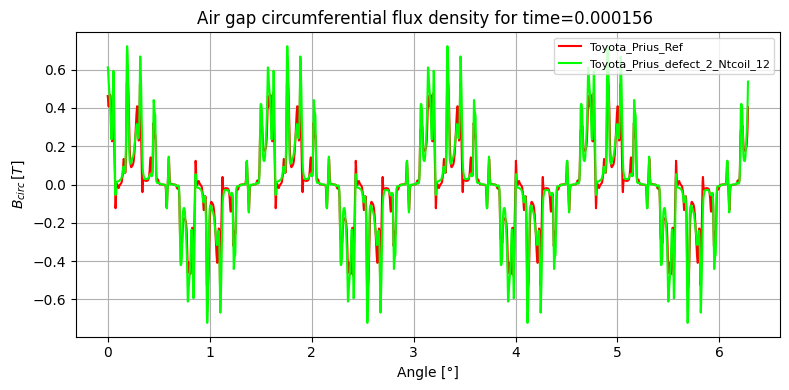

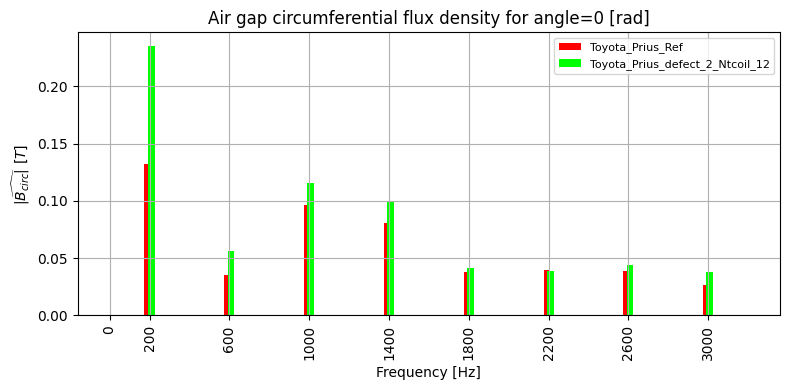

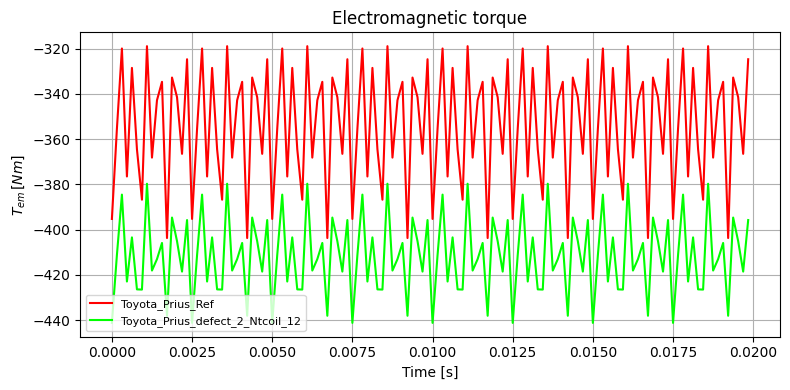

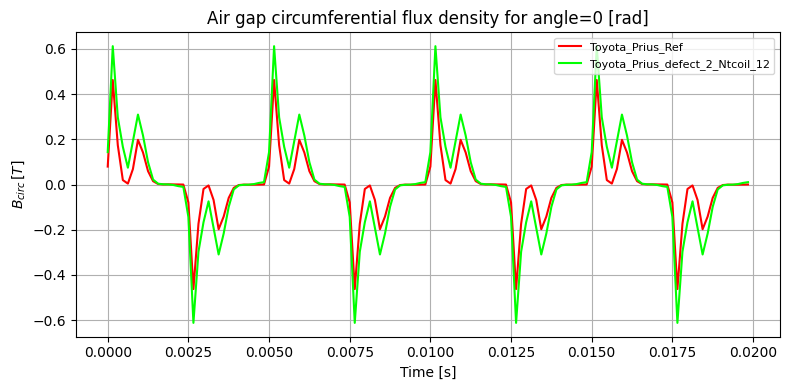

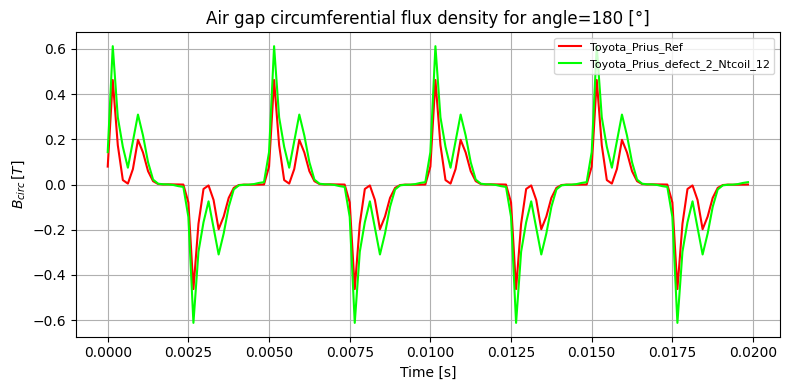

In [16]:
out_ref = simu_ref.run()
out_defect2 = simu_defect2.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect2,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_2_Ntcoil_12"]
)

In [17]:
out_defect2.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_2_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[09:35:52] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\Material.json
[09:35:52] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\M400-50A.json
[09:35:52] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\M400-50A_00001.json
[09:35:52] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\Air.json
[09:35:52] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\MagnetPrius.json
[09:35:52] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\MagnetPrius_00001.json
[09:35:52] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_2_ntcoil_12\M400-50A_00002.json
[09:35:52] Saving Copper1 in machin

In [25]:
#  RÉSOLUTION DU PROBLÈME DES MATÉRIAUX MANQUANTS DANS DEFECT1
print("=== - RÉSOLUTION DU PROBLÈME DES MATÉRIAUX MANQUANTS ===")

# Import des classes nécessaires
from pyleecan.Classes.MatMagnetics import MatMagnetics
from pyleecan.Classes.MatHT import MatHT
from pyleecan.Classes.Material import Material

# Vérification et correction des propriétés des matériaux pour defect1
try:
    print("Vérification des propriétés des matériaux pour defect1...")
    
    # Vérification et correction du stator
    if hasattr(simu_defect1.machine.stator, 'mat_type'):
        stator_mat = simu_defect1.machine.stator.mat_type
        
        # Vérification des propriétés magnétiques
        if not hasattr(stator_mat, 'mag') or stator_mat.mag is None:
            print("   Correction des propriétés magnétiques du stator...")
            stator_mat.mag = MatMagnetics()
            stator_mat.mag.mur_lin = 1.0
            stator_mat.mag.Brm20 = 0.0
            stator_mat.mag.alpha_Br = 0.0
            stator_mat.mag.is_BH_extrapolate = False
        
        # Vérification des propriétés thermiques
        if not hasattr(stator_mat, 'HT') or stator_mat.HT is None:
            print("   Correction des propriétés thermiques du stator...")
            stator_mat.HT = MatHT()
            stator_mat.HT.lambda_x = 1.0
            stator_mat.HT.lambda_y = 1.0
            stator_mat.HT.lambda_z = 1.0
            stator_mat.HT.Cp = 1.0
            stator_mat.HT.alpha = 0.0
        
        # Vérification des propriétés électriques
        if not hasattr(stator_mat, 'elec') or stator_mat.elec is None:
            print("   Correction des propriétés électriques du stator...")
            from pyleecan.Classes.MatElectrical import MatElectrical
            stator_mat.elec = MatElectrical()
            stator_mat.elec.rho = 0.0
            stator_mat.elec.epsr = 1.0
            stator_mat.elec.alpha = 0.0
    
    # Vérification et correction du rotor
    if hasattr(simu_defect1.machine.rotor, 'mat_type'):
        rotor_mat = simu_defect1.machine.rotor.mat_type
        
        # Vérification des propriétés magnétiques
        if not hasattr(rotor_mat, 'mag') or rotor_mat.mag is None:
            print("   Correction des propriétés magnétiques du rotor...")
            rotor_mat.mag = MatMagnetics()
            rotor_mat.mag.mur_lin = 1.0
            rotor_mat.mag.Brm20 = 0.0
            rotor_mat.mag.alpha_Br = 0.0
            rotor_mat.mag.is_BH_extrapolate = False
        
        # Vérification des propriétés thermiques
        if not hasattr(rotor_mat, 'HT') or rotor_mat.HT is None:
            print("   Correction des propriétés thermiques du rotor...")
            rotor_mat.HT = MatHT()
            rotor_mat.HT.lambda_x = 1.0
            rotor_mat.HT.lambda_y = 1.0
            rotor_mat.HT.lambda_z = 1.0
            rotor_mat.HT.Cp = 1.0
            rotor_mat.HT.alpha = 0.0
        
        # Vérification des propriétés électriques
        if not hasattr(rotor_mat, 'elec') or rotor_mat.elec is None:
            print("   Correction des propriétés électriques du rotor...")
            from pyleecan.Classes.MatElectrical import MatElectrical
            rotor_mat.elec = MatElectrical()
            rotor_mat.elec.rho = 0.0
            rotor_mat.elec.epsr = 1.0
            rotor_mat.elec.alpha = 0.0
    
    # Vérification et correction du frame
    if hasattr(simu_defect1.machine, 'frame') and hasattr(simu_defect1.machine.frame, 'mat_type'):
        frame_mat = simu_defect1.machine.frame.mat_type
        
        # Vérification des propriétés magnétiques
        if not hasattr(frame_mat, 'mag') or frame_mat.mag is None:
            print("   Correction des propriétés magnétiques du frame...")
            frame_mat.mag = MatMagnetics()
            frame_mat.mag.mur_lin = 1.0
            frame_mat.mag.Brm20 = 0.0
            frame_mat.mag.alpha_Br = 0.0
            frame_mat.mag.is_BH_extrapolate = False
        
        # Vérification des propriétés thermiques
        if not hasattr(frame_mat, 'HT') or frame_mat.HT is None:
            print("   Correction des propriétés thermiques du frame...")
            frame_mat.HT = MatHT()
            frame_mat.HT.lambda_x = 1.0
            frame_mat.HT.lambda_y = 1.0
            frame_mat.HT.lambda_z = 1.0
            frame_mat.HT.Cp = 1.0
            frame_mat.HT.alpha = 0.0
        
        # Vérification des propriétés électriques
        if not hasattr(frame_mat, 'elec') or frame_mat.elec is None:
            print("   Correction des propriétés électriques du frame...")
            from pyleecan.Classes.MatElectrical import MatElectrical
            frame_mat.elec = MatElectrical()
            frame_mat.elec.rho = 0.0
            frame_mat.elec.epsr = 1.0
            frame_mat.elec.alpha = 0.0
    
    # Vérification des aimants dans les trous du rotor
    if hasattr(simu_defect1.machine.rotor, 'hole') and len(simu_defect1.machine.rotor.hole) > 0:
        for hole in simu_defect1.machine.rotor.hole:
            if hasattr(hole, 'magnet_0') and hole.magnet_0 is not None:
                magnet_mat = hole.magnet_0.mat_type
                if magnet_mat is not None:
                    # Vérification des propriétés magnétiques des aimants
                    if not hasattr(magnet_mat, 'mag') or magnet_mat.mag is None:
                        print("   Correction des propriétés magnétiques des aimants...")
                        magnet_mat.mag = MatMagnetics()
                        magnet_mat.mag.mur_lin = 1.0
                        magnet_mat.mag.Brm20 = 0.0
                        magnet_mat.mag.alpha_Br = 0.0
                        magnet_mat.mag.is_BH_extrapolate = False
    
    print("   ✓ Propriétés des matériaux corrigées avec succès")
    
except Exception as e:
    print(f"   Erreur lors de la correction des matériaux: {e}")

=== - RÉSOLUTION DU PROBLÈME DES MATÉRIAUX MANQUANTS ===
Vérification des propriétés des matériaux pour defect1...
   ✓ Propriétés des matériaux corrigées avec succès


In [28]:
#  EXÉCUTION DE LA SIMULATION DEFECT1 AVEC MATÉRIAUX CORRIGÉS
print("\n=== BLOC 21 - EXÉCUTION DE LA SIMULATION DEFECT1 ===")

try:
    print("Exécution de la simulation defect1 avec matériaux corrigés...")
    out_defect1 = simu_defect1.run()
    print("   ✓ Simulation defect1 exécutée avec succès")
    
    # Comparaison des résultats
    compare_simulation_results(
        out1=out_ref,
        out2=out_defect1,
        legend_list=["Toyota_Prius_Ref", "Toyota_Prius_Defect1"],
        title="Comparaison: Référence vs Defect1 (Matériaux Corrigés)"
    )
    
    # Sauvegarde des résultats
    out_defect1.save(
        save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_1_ntcoil_12_fixed', 
        is_folder=True, 
        type_handle_old=2, 
        type_compression=0
    )
    print("   ✓ Résultats sauvegardés avec succès")
    
except Exception as e:
    print(f"   Erreur lors de la simulation defect1: {e}")
    print("   Tentative de diagnostic supplémentaire...")
    
    # Diagnostic supplémentaire corrigé
    try:
        print("   Vérification des propriétés de la machine...")
        print(f"   - Nombre de pôles: {simu_defect1.machine.stator.winding.p}")
        print(f"   - Nombre de tours par bobine: {simu_defect1.machine.stator.winding.Ntcoil}")
        
        # Correction de l'accès aux paramètres de simulation
        if hasattr(simu_defect1, 'input') and hasattr(simu_defect1.input, 'OP'):
            print(f"   - Vitesse de rotation: {simu_defect1.input.OP.N0} rpm")
        else:
            print("   - Vitesse de rotation: non définie")
        
        if hasattr(simu_defect1.input, 'time'):
           simu_defect1.input.time.get_data().size
        else:
            print("   - Nombre d'étapes: non défini")
        
        # Vérification des matériaux
        if hasattr(simu_defect1.machine.stator, 'mat_type'):
            print("   - Matériaux du stator définis")
        if hasattr(simu_defect1.machine.rotor, 'mat_type'):
            print("   - Matériaux du rotor définis")
        if hasattr(simu_defect1.machine, 'frame') and hasattr(simu_defect1.machine.frame, 'mat_type'):
            print("   - Matériaux du frame définis")
            
        # Vérification des aimants
        if hasattr(simu_defect1.machine.rotor, 'hole') and len(simu_defect1.machine.rotor.hole) > 0:
            print(f"   - Nombre de trous dans le rotor: {len(simu_defect1.machine.rotor.hole)}")
            for i, hole in enumerate(simu_defect1.machine.rotor.hole):
                if hasattr(hole, 'magnet_0') and hole.magnet_0 is not None:
                    print(f"   - Aimant {i+1} présent")
                else:
                    print(f"   - Aimant {i+1} manquant")
            
    except Exception as diag_e:
        print(f"   Erreur lors du diagnostic: {diag_e}")


=== BLOC 21 - EXÉCUTION DE LA SIMULATION DEFECT1 ===
Exécution de la simulation defect1 avec matériaux corrigés...
[11:53:37] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_1_Ntcoil_12)
[11:53:37] Starting Magnetic module
[11:53:40] Computing Airgap Flux in FEMM
   Erreur lors de la simulation defect1: error: Material properties have not been defined for all regions
   Tentative de diagnostic supplémentaire...
   Vérification des propriétés de la machine...
   - Nombre de pôles: 4
   - Nombre de tours par bobine: 12
   - Vitesse de rotation: 3000 rpm
   - Matériaux du stator définis
   - Matériaux du rotor définis
   - Matériaux du frame définis
   - Nombre de trous dans le rotor: 1
   - Aimant 1 présent


In [27]:
out_ref = simu_ref.run()
out_defect1 = simu_defect1.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect1,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_1_Ntcoil_12"]
)

[10:58:39] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[10:58:39] Starting Magnetic module
[10:58:43] Computing Airgap Flux in FEMM
[10:58:56] End of simulation FEMM_simulation
[10:58:56] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_1_Ntcoil_12)
[10:58:56] Starting Magnetic module
[10:58:57] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [10]:
out_defect1.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_1_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[17:13:23] Saving Material in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\Material.json
[17:13:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\M400-50A.json
[17:13:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\M400-50A_00001.json
[17:13:23] Saving Air in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\Air.json
[17:13:23] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\MagnetPrius.json
[17:13:23] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\MagnetPrius_00001.json
[17:13:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_healthy/Ntcoil_12\compar_simule_healthy_1_ntcoil_12\M400-50A_00002.json
[17:13:23] Saving Cop

In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [30]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect3 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_3_Ntcoil_12.json")
machine_defect4 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_4_Ntcoil_12.json")

In [31]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect3 = load_simulation(name="defect3", machine=machine_defect3, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect4 = load_simulation(name="defect4", machine=machine_defect4, rotor_speed=3000, stop=1, num_steps=4000)

[13:58:53] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[13:58:53] Starting Magnetic module
[13:58:55] Computing Airgap Flux in FEMM
[13:59:04] End of simulation FEMM_simulation
[13:59:04] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_3_Ntcoil_12)
[13:59:04] Starting Magnetic module
[13:59:06] Computing Airgap Flux in FEMM
[13:59:14] End of simulation FEMM_simulation


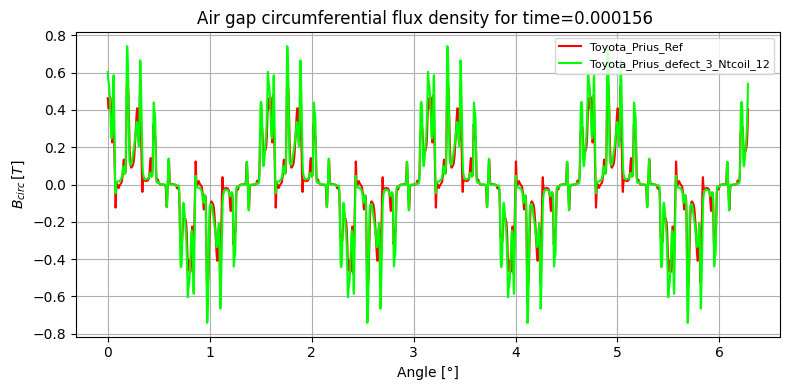

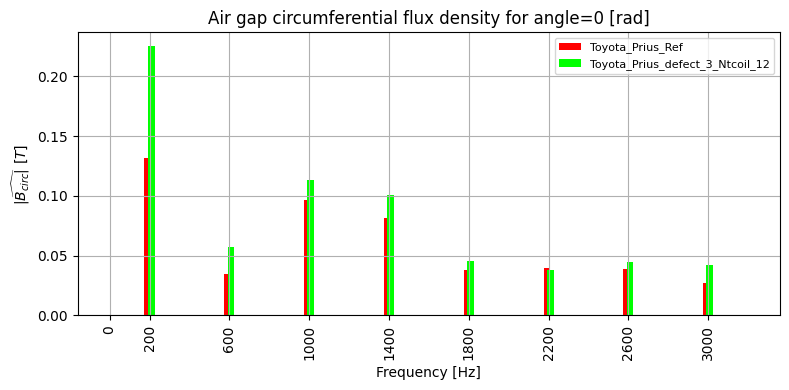

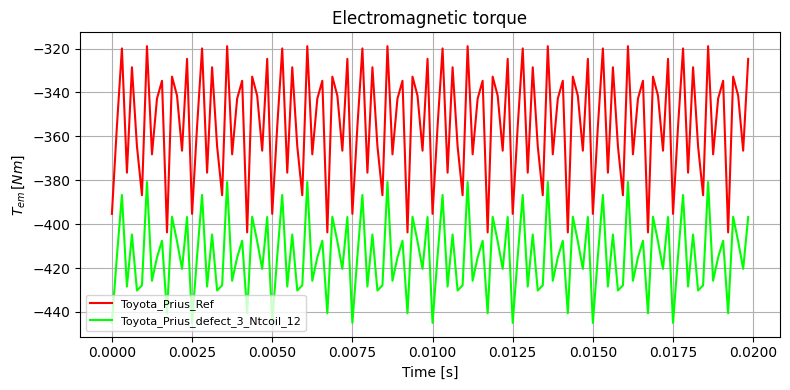

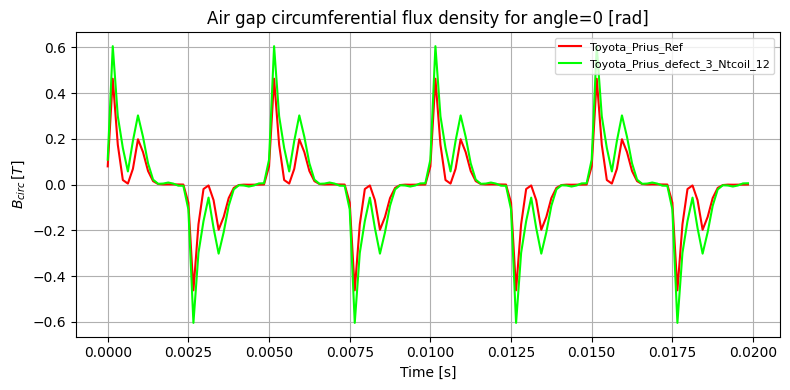

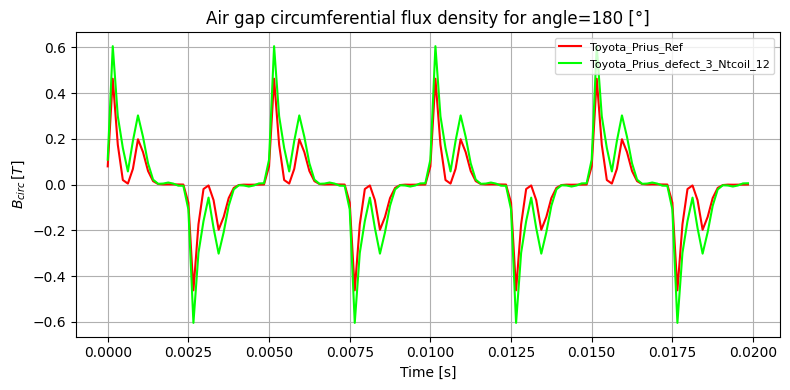

In [33]:
out_ref = simu_ref.run()
out_defect3 = simu_defect3.run()
# out_defect4 = simu_defect4.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect3,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_3_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect4,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_4_Ntcoil_12"]
# )

In [34]:
out_defect3.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_3_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:02:03] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\Material.json
[14:02:03] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\M400-50A.json
[14:02:03] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\M400-50A_00001.json
[14:02:03] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\Air.json
[14:02:03] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\MagnetPrius.json
[14:02:03] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\MagnetPrius_00001.json
[14:02:03] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_3_ntcoil_12\M400-50A_00002.json
[14:02:03] Saving Copper1 in machin

In [35]:
# out_defect4.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_4_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [36]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect5 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_5_Ntcoil_12.json")
machine_defect6 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_6_Ntcoil_12.json")

In [37]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect5 = load_simulation(name="defect5", machine=machine_defect5, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect6 = load_simulation(name="defect6", machine=machine_defect6, rotor_speed=3000, stop=1, num_steps=4000)

[14:04:31] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:04:31] Starting Magnetic module
[14:04:34] Computing Airgap Flux in FEMM
[14:04:42] End of simulation FEMM_simulation
[14:04:42] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_5_Ntcoil_12)
[14:04:42] Starting Magnetic module
[14:04:43] Computing Airgap Flux in FEMM
[14:04:52] End of simulation FEMM_simulation
[14:04:52] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_6_Ntcoil_12)
[14:04:52] Starting Magnetic module
[14:04:53] Computing Airgap Flux in FEMM
[14:05:02] End of simulation FEMM_simulation


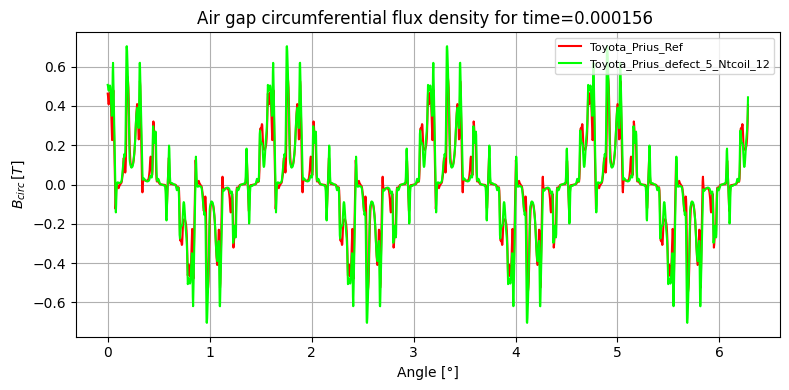

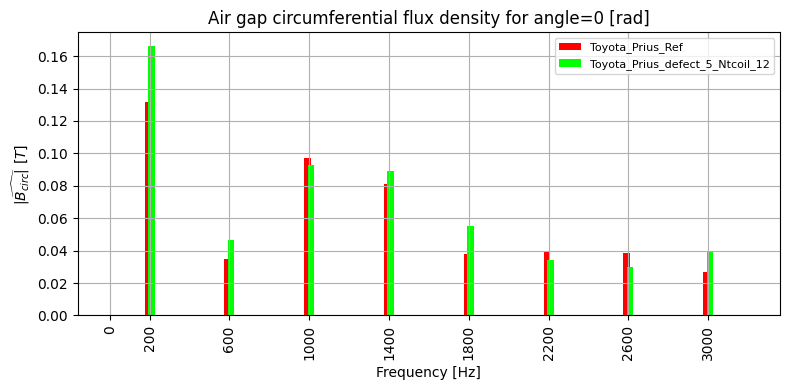

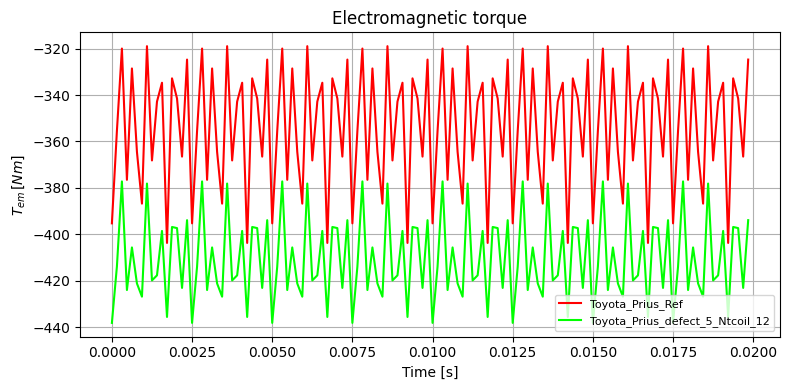

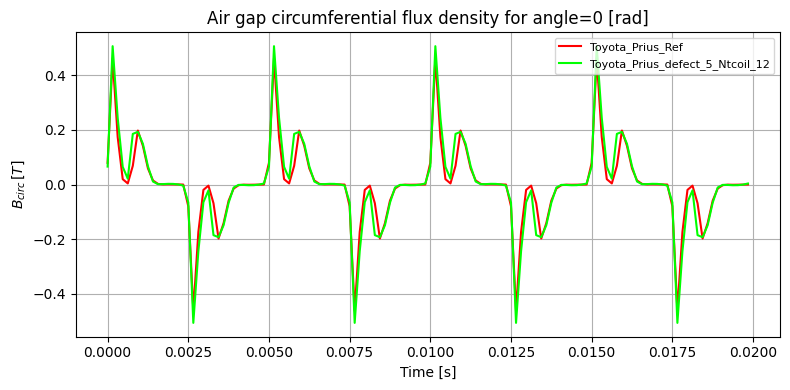

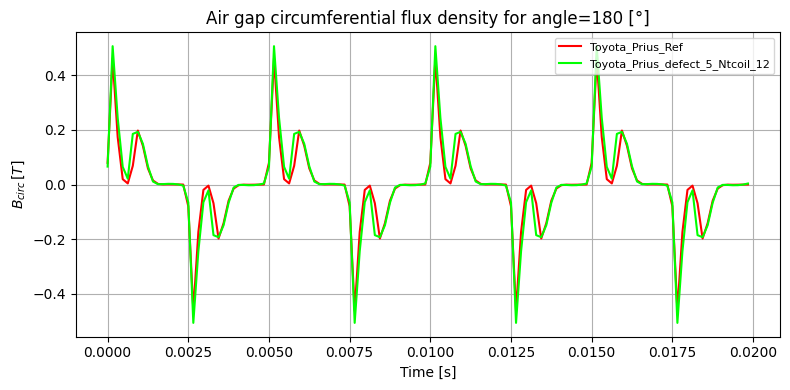

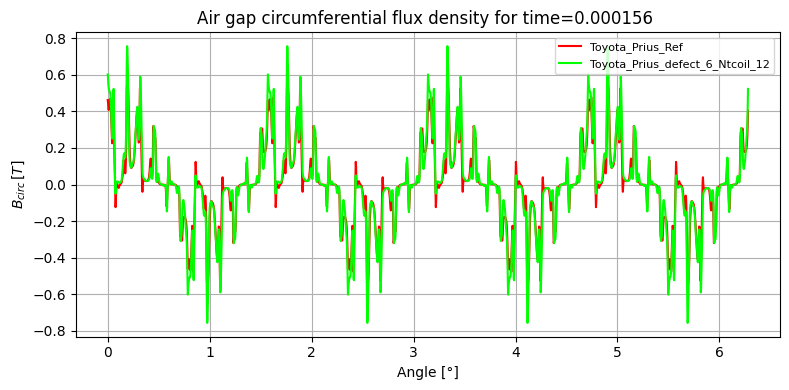

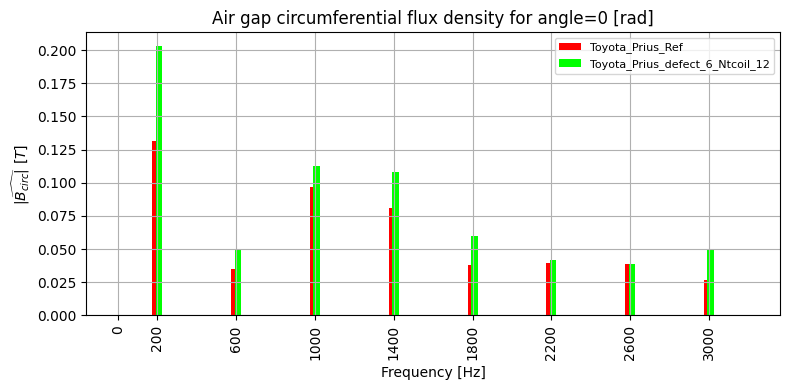

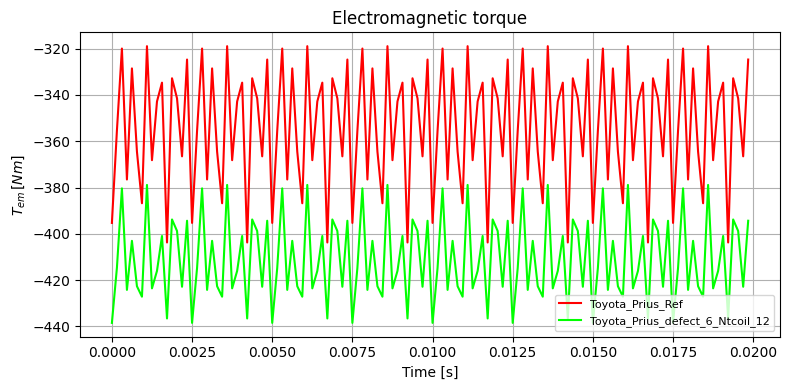

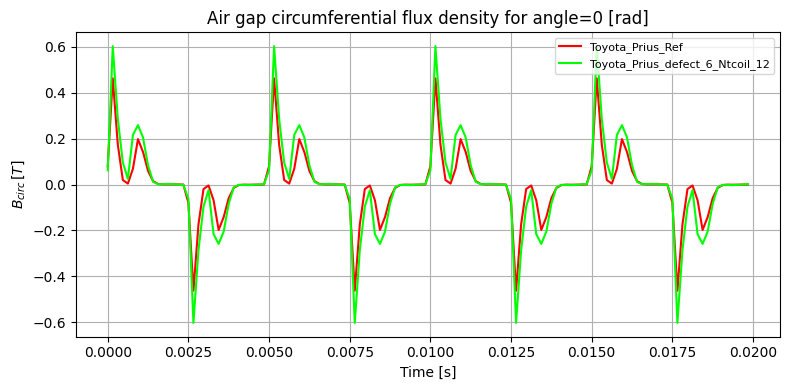

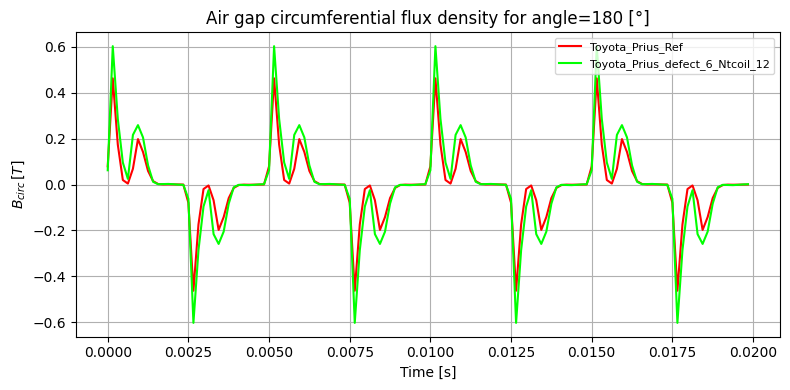

In [39]:
out_ref = simu_ref.run()
out_defect5 = simu_defect5.run()
out_defect6 = simu_defect6.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect5,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_5_Ntcoil_12"]
)
compare_simulation_results(
    out1=out_ref,
    out2=out_defect6,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_6_Ntcoil_12"]
)

In [40]:
out_defect5.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_5_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:05:20] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\Material.json
[14:05:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\M400-50A.json
[14:05:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\M400-50A_00001.json
[14:05:20] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\Air.json
[14:05:20] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\MagnetPrius.json
[14:05:20] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\MagnetPrius_00001.json
[14:05:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_5_ntcoil_12\M400-50A_00002.json
[14:05:20] Saving Copper1 in machin

In [41]:
out_defect6.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_6_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:05:29] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\Material.json
[14:05:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\M400-50A.json
[14:05:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\M400-50A_00001.json
[14:05:29] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\Air.json
[14:05:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\MagnetPrius.json
[14:05:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\MagnetPrius_00001.json
[14:05:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_6_ntcoil_12\M400-50A_00002.json
[14:05:29] Saving Copper1 in machin

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [42]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect7 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_7_Ntcoil_12.json")
machine_defect8 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_8_Ntcoil_12.json")

In [43]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect7 = load_simulation(name="defect7", machine=machine_defect7, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect8 = load_simulation(name="defect8", machine=machine_defect8, rotor_speed=3000, stop=1, num_steps=4000)

[14:07:54] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:07:54] Starting Magnetic module
[14:07:56] Computing Airgap Flux in FEMM
[14:08:04] End of simulation FEMM_simulation
[14:08:04] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_8_Ntcoil_12)
[14:08:04] Starting Magnetic module
[14:08:06] Computing Airgap Flux in FEMM
[14:08:21] End of simulation FEMM_simulation


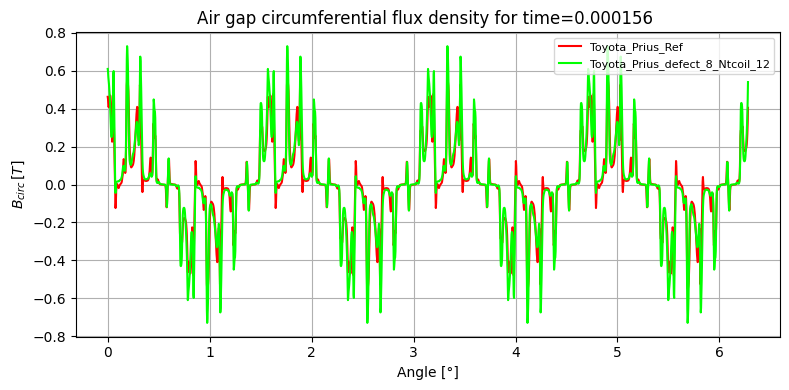

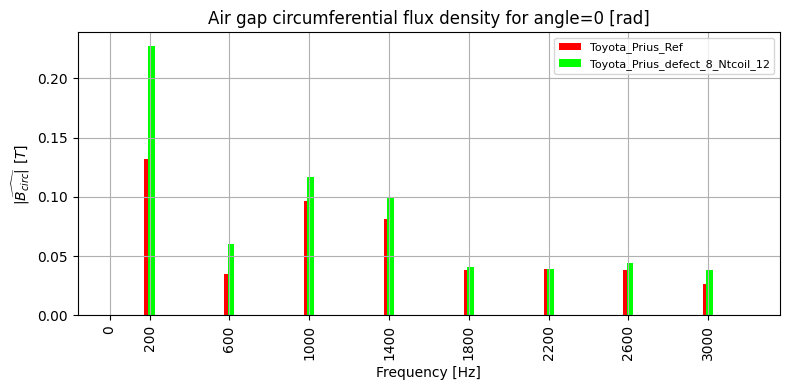

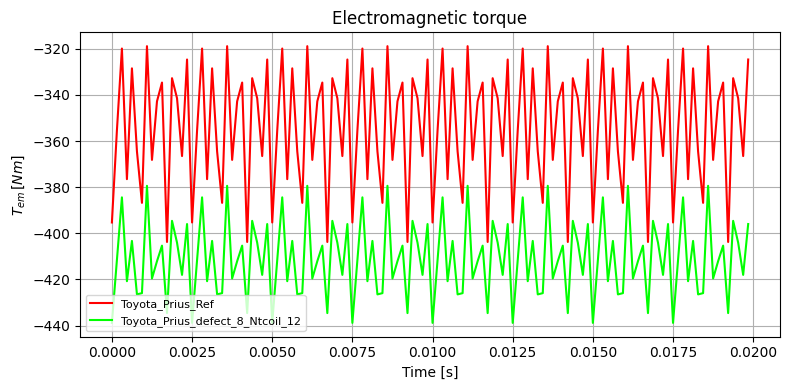

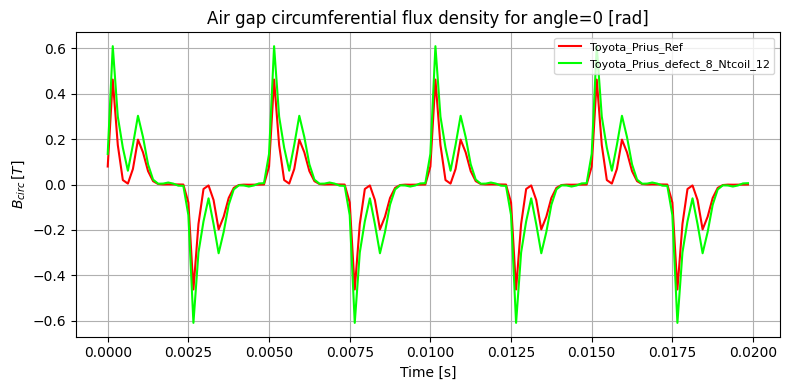

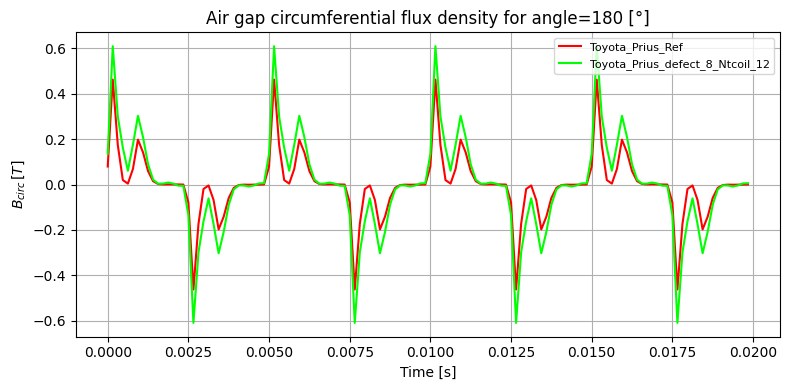

In [46]:
out_ref = simu_ref.run()
# out_defect7 = simu_defect7.run()
out_defect8 = simu_defect8.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect7,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_7_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect8,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_8_Ntcoil_12"]
)

In [47]:
# out_defect7.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_7_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [48]:
out_defect8.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_8_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:08:50] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\Material.json
[14:08:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\M400-50A.json
[14:08:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\M400-50A_00001.json
[14:08:50] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\Air.json
[14:08:50] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\MagnetPrius.json
[14:08:50] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\MagnetPrius_00001.json
[14:08:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_8_ntcoil_12\M400-50A_00002.json
[14:08:50] Saving Copper1 in machin

In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [49]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect9 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_9_Ntcoil_12.json")
machine_defect10 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_10_Ntcoil_12.json")

In [50]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect9 = load_simulation(name="defect9", machine=machine_defect9, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect10 = load_simulation(name="defect10", machine=machine_defect10, rotor_speed=3000, stop=1, num_steps=4000)

[14:09:25] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:09:25] Starting Magnetic module
[14:09:27] Computing Airgap Flux in FEMM
[14:09:41] End of simulation FEMM_simulation
[14:09:41] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_9_Ntcoil_12)
[14:09:41] Starting Magnetic module
[14:09:44] Computing Airgap Flux in FEMM
[14:09:54] End of simulation FEMM_simulation
[14:09:54] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_10_Ntcoil_12)
[14:09:54] Starting Magnetic module
[14:09:56] Computing Airgap Flux in FEMM
[14:10:08] End of simulation FEMM_simulation


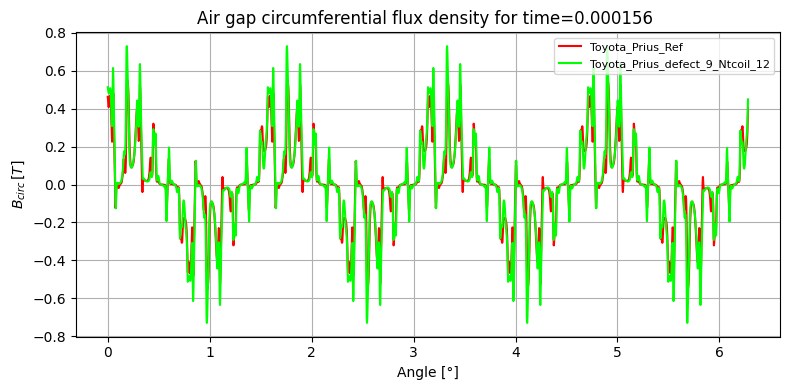

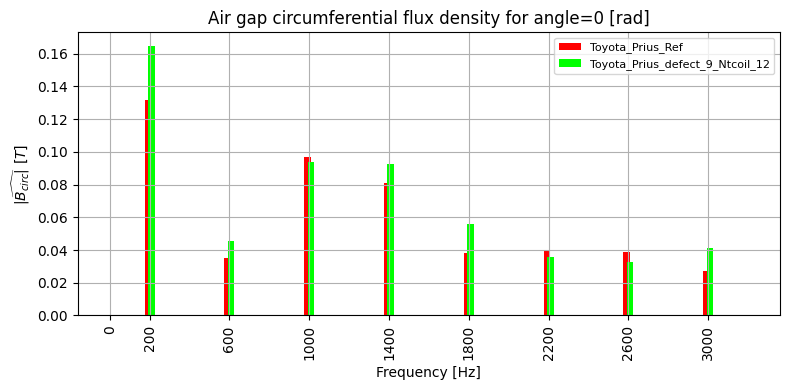

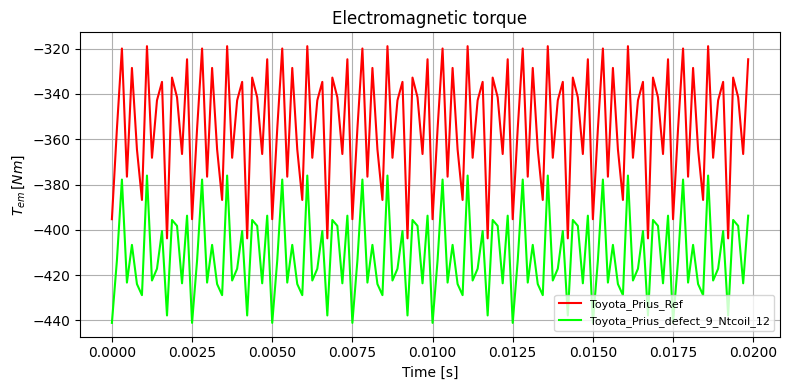

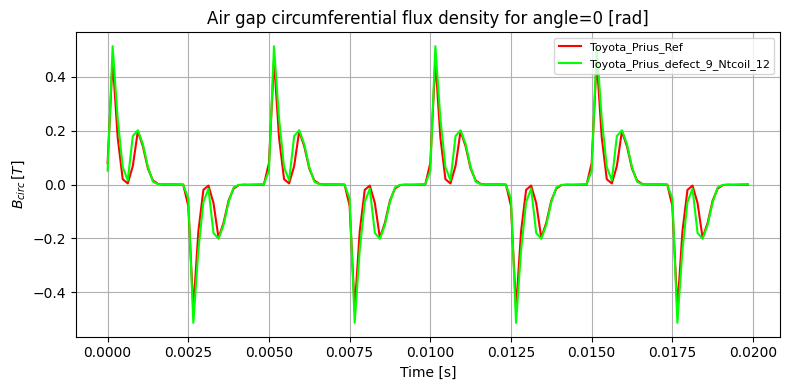

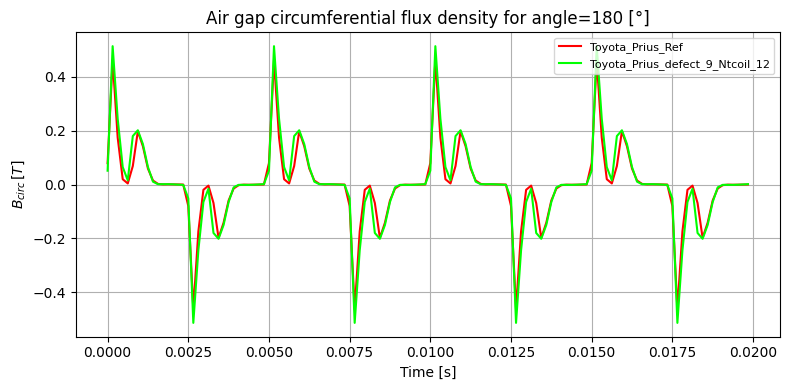

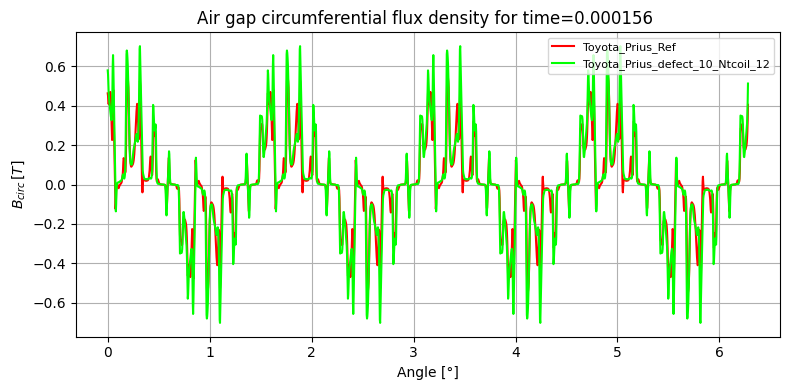

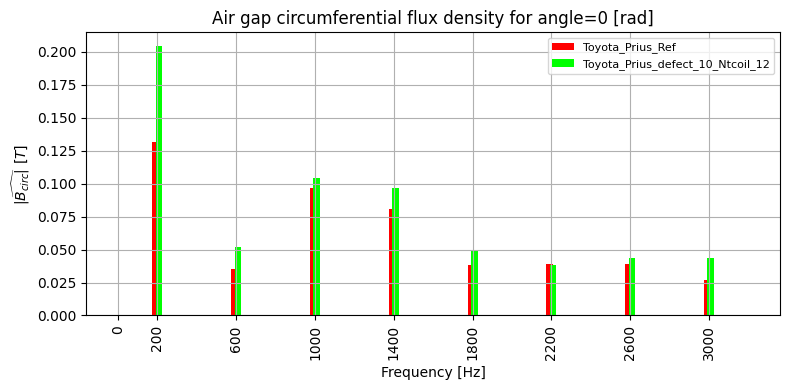

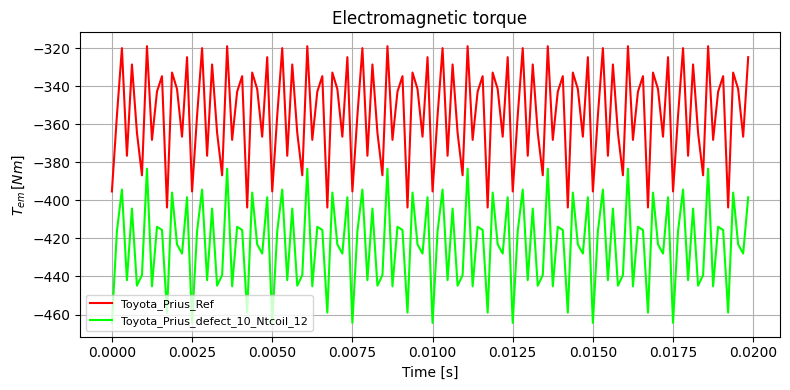

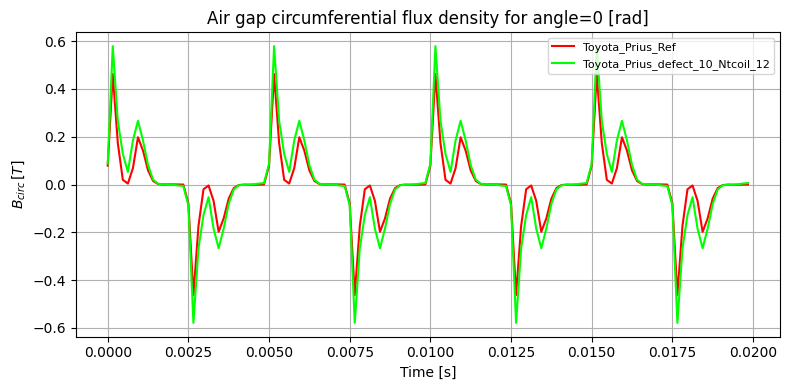

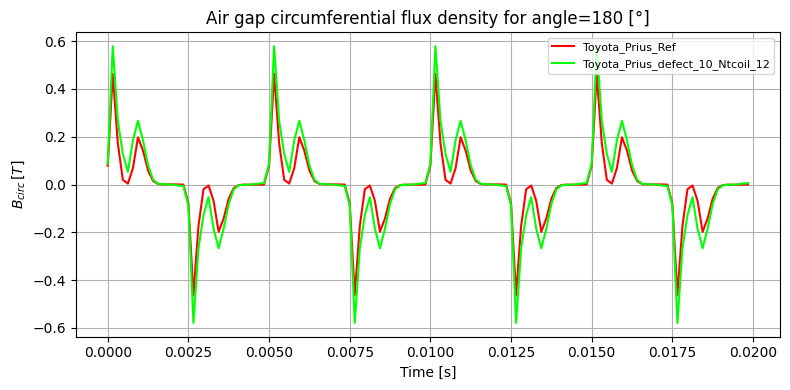

In [51]:
out_ref = simu_ref.run()
out_defect9 = simu_defect9.run()
out_defect10 = simu_defect10.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect9,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_9_Ntcoil_12"]
)
compare_simulation_results(
    out1=out_ref,
    out2=out_defect10,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_10_Ntcoil_12"]
)

In [52]:
out_defect9.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_9_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:11:27] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\Material.json
[14:11:27] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\M400-50A.json
[14:11:27] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\M400-50A_00001.json
[14:11:27] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\Air.json
[14:11:27] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\MagnetPrius.json
[14:11:27] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\MagnetPrius_00001.json
[14:11:27] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_9_ntcoil_12\M400-50A_00002.json
[14:11:27] Saving Copper1 in machin

In [53]:
out_defect10.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_10_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:11:32] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\Material.json
[14:11:32] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\M400-50A.json
[14:11:32] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\M400-50A_00001.json
[14:11:32] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\Air.json
[14:11:32] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\MagnetPrius.json
[14:11:32] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\MagnetPrius_00001.json
[14:11:32] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_10_ntcoil_12\M400-50A_00002.json
[14:11:32] Saving Copper1 in

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [54]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect11 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_11_Ntcoil_12.json")
machine_defect12 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_12_Ntcoil_12.json")

In [55]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect11 = load_simulation(name="defect11", machine=machine_defect11, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect12 = load_simulation(name="defect12", machine=machine_defect12, rotor_speed=3000, stop=1, num_steps=4000)

[14:13:24] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:13:25] Starting Magnetic module
[14:13:27] Computing Airgap Flux in FEMM
[14:13:35] End of simulation FEMM_simulation
[14:13:35] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_11_Ntcoil_12)
[14:13:35] Starting Magnetic module
[14:13:36] Computing Airgap Flux in FEMM
[14:13:44] End of simulation FEMM_simulation
[14:13:44] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_12_Ntcoil_12)
[14:13:44] Starting Magnetic module
[14:13:46] Computing Airgap Flux in FEMM
[14:13:55] End of simulation FEMM_simulation


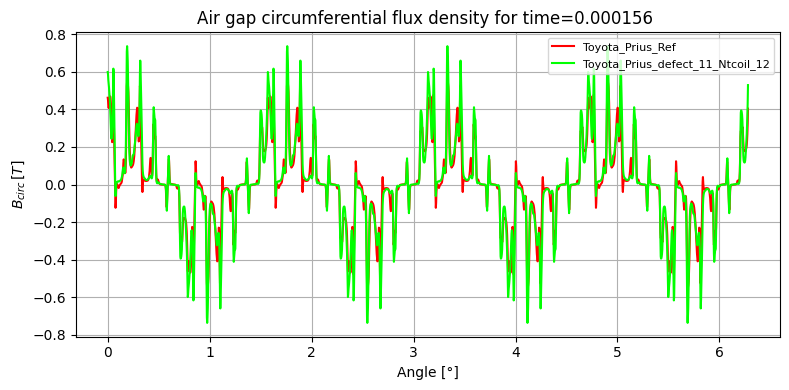

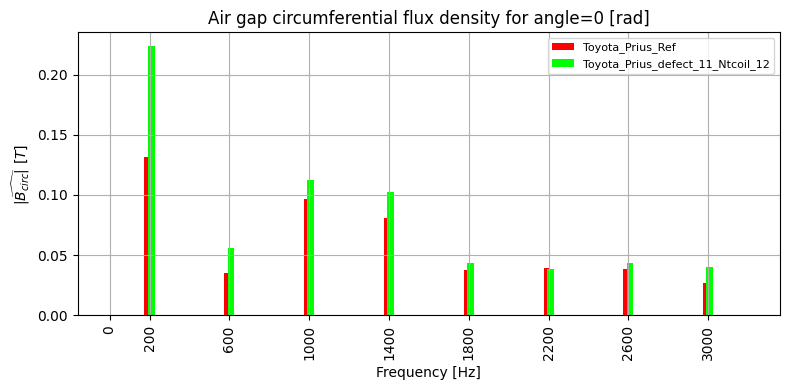

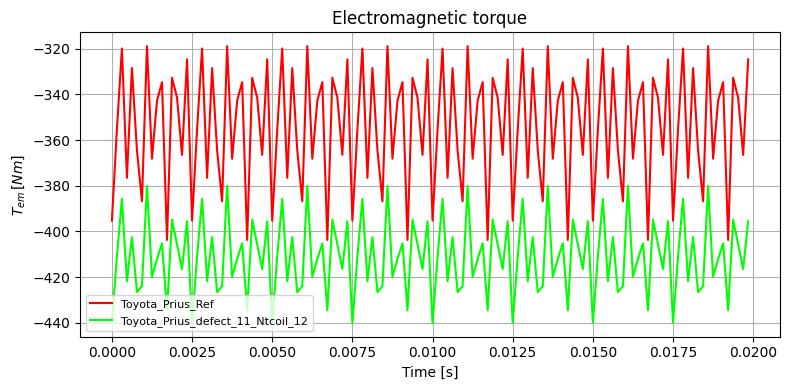

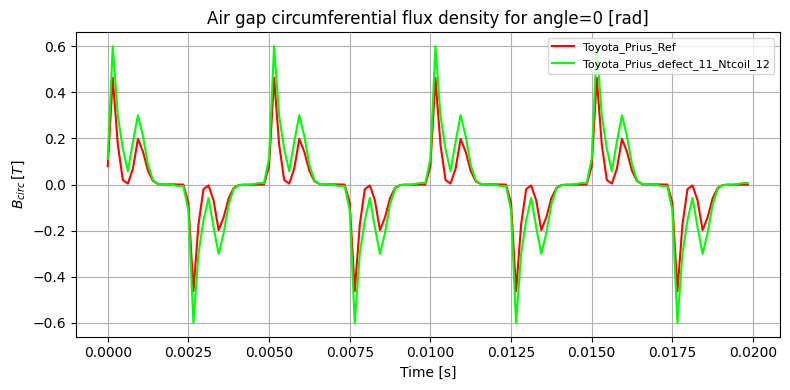

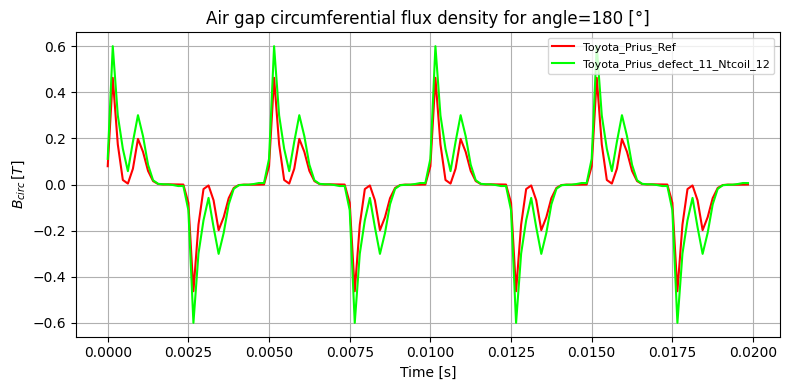

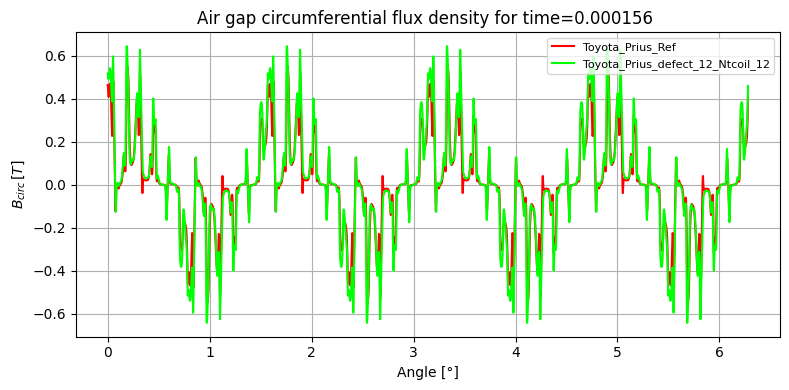

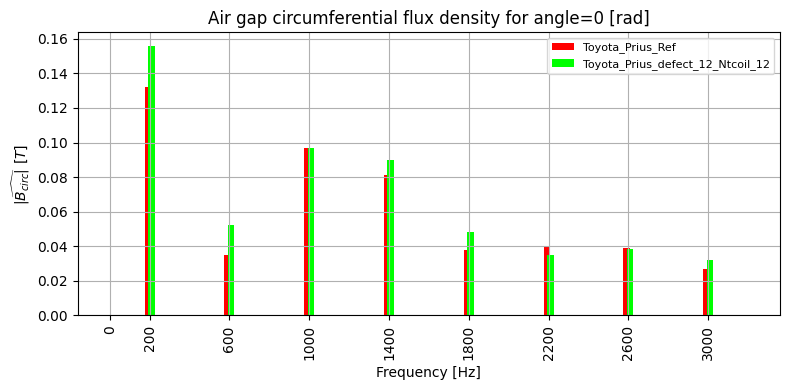

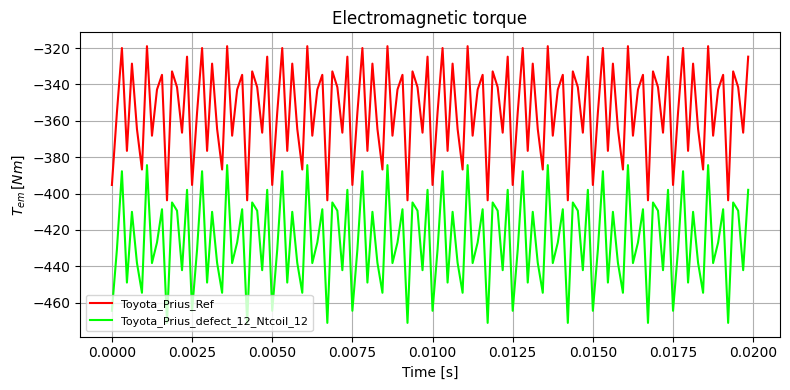

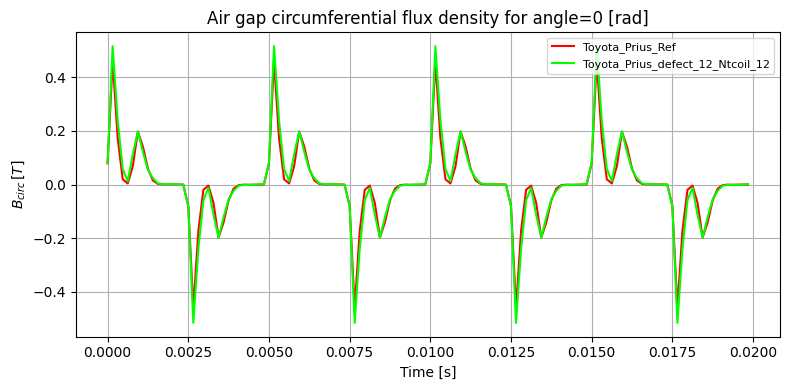

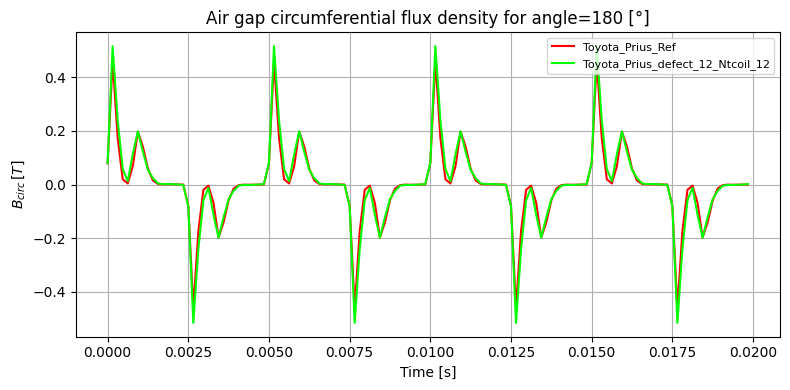

In [57]:
out_ref = simu_ref.run()
out_defect11 = simu_defect11.run()
out_defect12 = simu_defect12.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect11,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_11_Ntcoil_12"]
)
compare_simulation_results(
    out1=out_ref,
    out2=out_defect12,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_12_Ntcoil_12"]
)

In [58]:
out_defect11.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_11_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:14:10] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\Material.json
[14:14:10] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\M400-50A.json
[14:14:10] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\M400-50A_00001.json
[14:14:10] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\Air.json
[14:14:10] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\MagnetPrius.json
[14:14:10] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\MagnetPrius_00001.json
[14:14:10] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_11_ntcoil_12\M400-50A_00002.json
[14:14:10] Saving Copper1 in

In [59]:
out_defect12.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_12_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:14:13] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\Material.json
[14:14:13] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\M400-50A.json
[14:14:13] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\M400-50A_00001.json
[14:14:13] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\Air.json
[14:14:13] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\MagnetPrius.json
[14:14:13] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\MagnetPrius_00001.json
[14:14:13] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_12_ntcoil_12\M400-50A_00002.json
[14:14:13] Saving Copper1 in

In [ ]:
-------------------------------------------------------------------------------------------------------------------------------

In [60]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect13 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_13_Ntcoil_12.json")
machine_defect14= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_14_Ntcoil_12.json")

In [61]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect13 = load_simulation(name="defect13", machine=machine_defect13, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect14 = load_simulation(name="defect14", machine=machine_defect14, rotor_speed=3000, stop=1, num_steps=4000)

[14:16:06] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:16:06] Starting Magnetic module
[14:16:08] Computing Airgap Flux in FEMM
[14:16:17] End of simulation FEMM_simulation
[14:16:17] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_14_Ntcoil_12)
[14:16:18] Starting Magnetic module
[14:16:19] Computing Airgap Flux in FEMM
[14:16:32] End of simulation FEMM_simulation


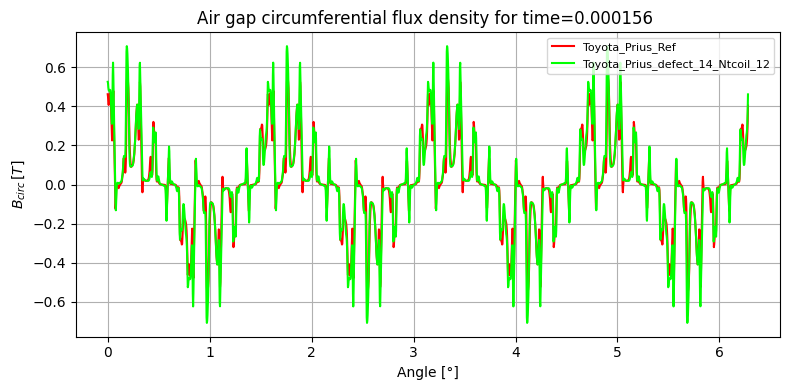

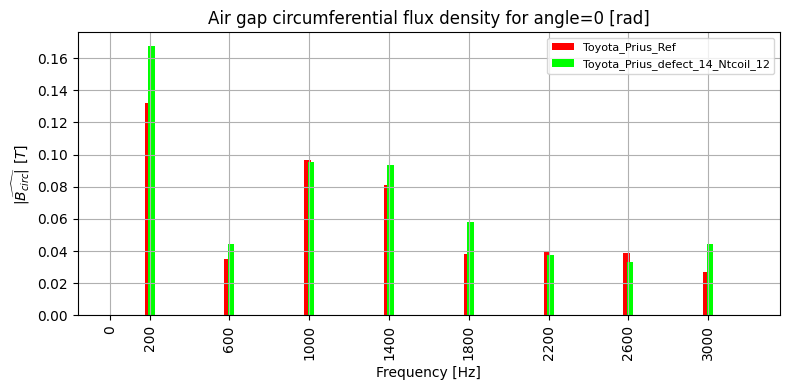

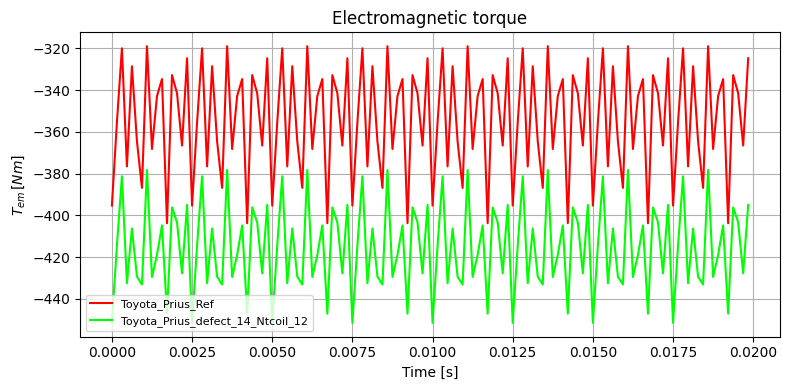

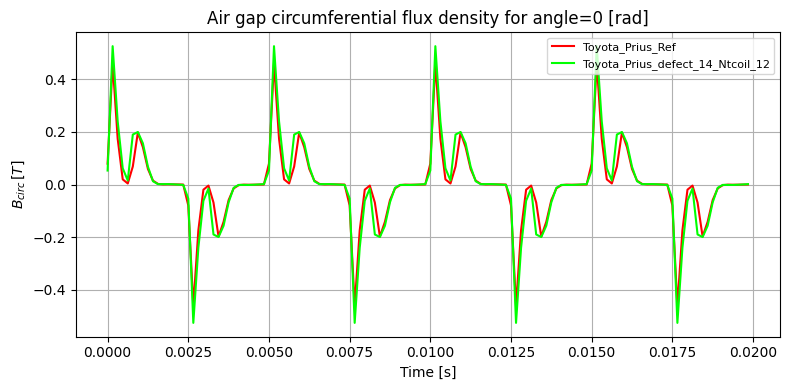

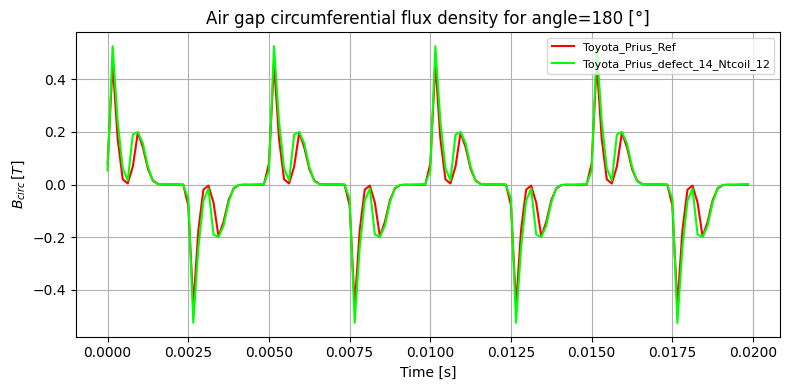

In [65]:
out_ref = simu_ref.run()
# out_defect13 = simu_defect13.run()
out_defect14 = simu_defect14.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect13,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_13_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect14,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_14_Ntcoil_12"]
)

In [66]:
# out_defect13.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_13_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [67]:
out_defect14.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_14_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:16:59] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\Material.json
[14:16:59] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\M400-50A.json
[14:16:59] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\M400-50A_00001.json
[14:16:59] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\Air.json
[14:16:59] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\MagnetPrius.json
[14:16:59] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\MagnetPrius_00001.json
[14:16:59] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_14_ntcoil_12\M400-50A_00002.json
[14:16:59] Saving Copper1 in

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [68]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect15 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_15_Ntcoil_12.json")
machine_defect16= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_16_Ntcoil_12.json")

In [69]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect15 = load_simulation(name="defect15", machine=machine_defect15, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect16 = load_simulation(name="defect16", machine=machine_defect16, rotor_speed=3000, stop=1, num_steps=4000)

[14:17:49] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:17:49] Starting Magnetic module
[14:17:50] Computing Airgap Flux in FEMM
[14:18:01] End of simulation FEMM_simulation
[14:18:01] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_16_Ntcoil_12)
[14:18:01] Starting Magnetic module
[14:18:02] Computing Airgap Flux in FEMM
[14:18:11] End of simulation FEMM_simulation


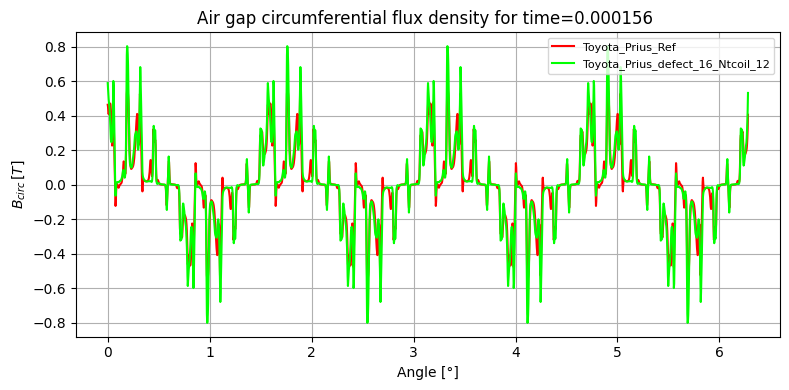

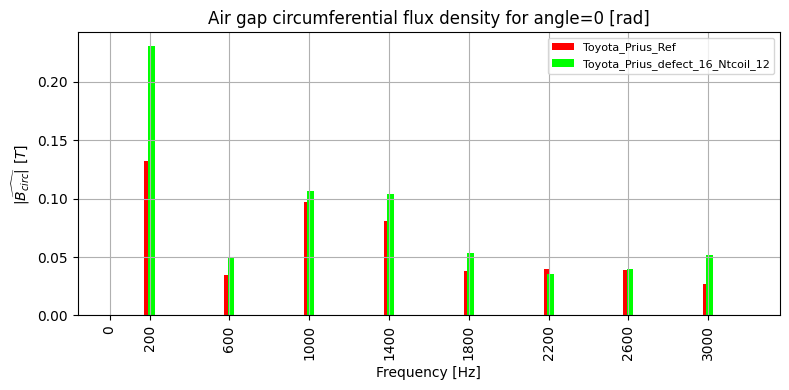

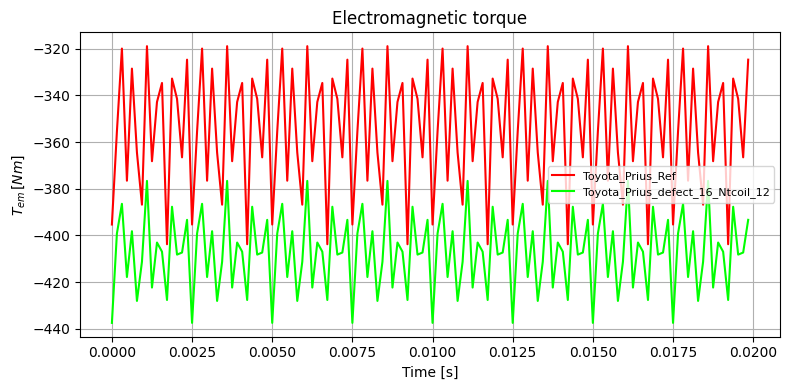

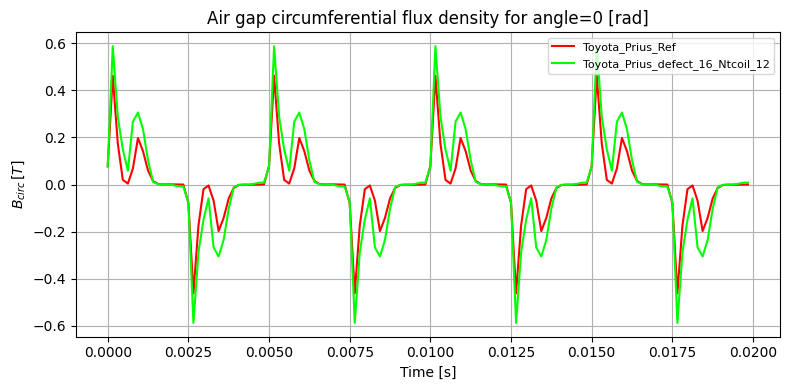

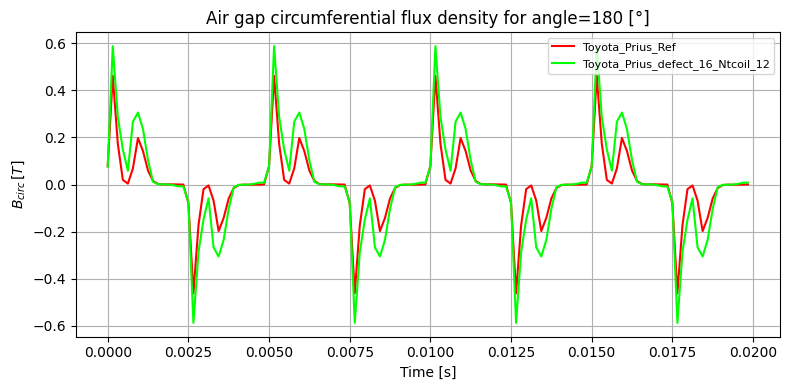

In [71]:
out_ref = simu_ref.run()
# out_defect15 = simu_defect15.run()
out_defect16 = simu_defect16.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect15,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_15_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect16,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_16_Ntcoil_12"]
)

In [72]:
# out_defect15.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_15_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [73]:
out_defect16.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_16_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:18:29] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\Material.json
[14:18:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\M400-50A.json
[14:18:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\M400-50A_00001.json
[14:18:29] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\Air.json
[14:18:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\MagnetPrius.json
[14:18:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\MagnetPrius_00001.json
[14:18:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_16_ntcoil_12\M400-50A_00002.json
[14:18:29] Saving Copper1 in

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [74]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect17 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_17_Ntcoil_12.json")
machine_defect18 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_18_Ntcoil_12.json")

In [75]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect17 = load_simulation(name="defect17", machine=machine_defect17, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect18 = load_simulation(name="defect18", machine=machine_defect18, rotor_speed=3000, stop=1, num_steps=4000)

[14:20:39] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:20:39] Starting Magnetic module
[14:20:43] Computing Airgap Flux in FEMM
[14:21:12] End of simulation FEMM_simulation
[14:21:12] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_18_Ntcoil_12)
[14:21:12] Starting Magnetic module
[14:21:18] Computing Airgap Flux in FEMM
[14:21:38] End of simulation FEMM_simulation


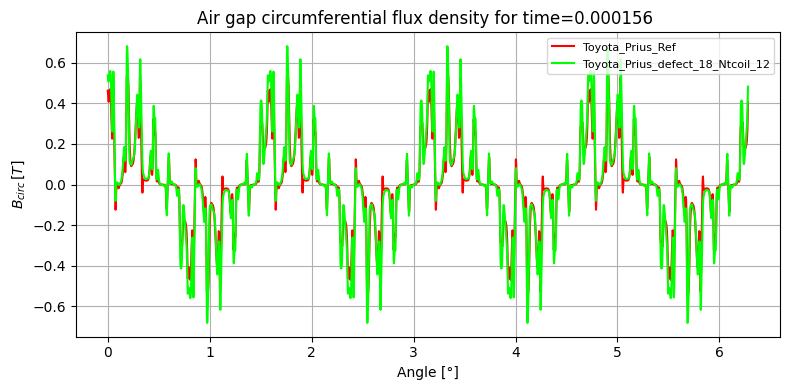

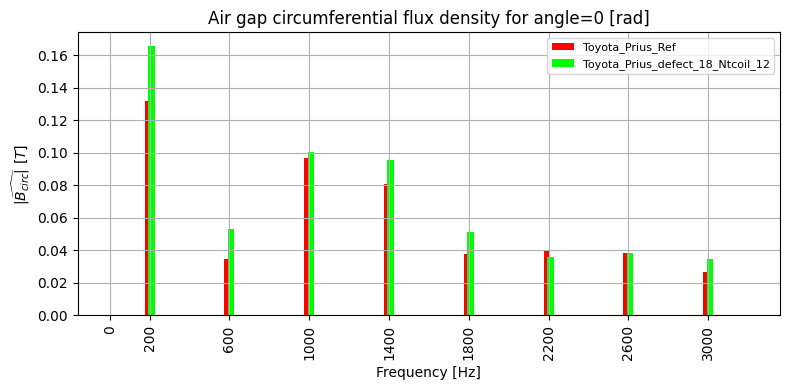

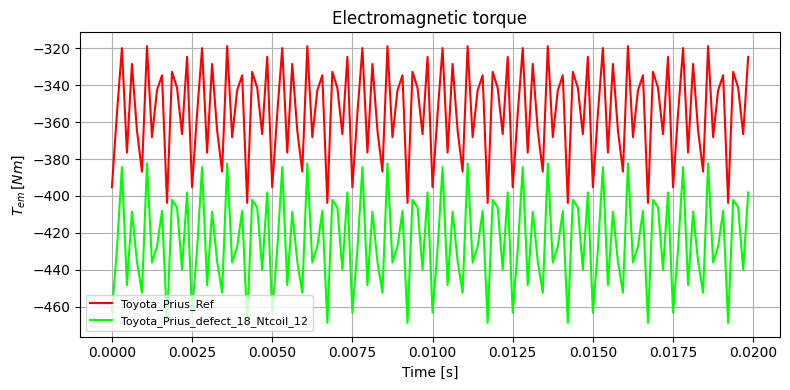

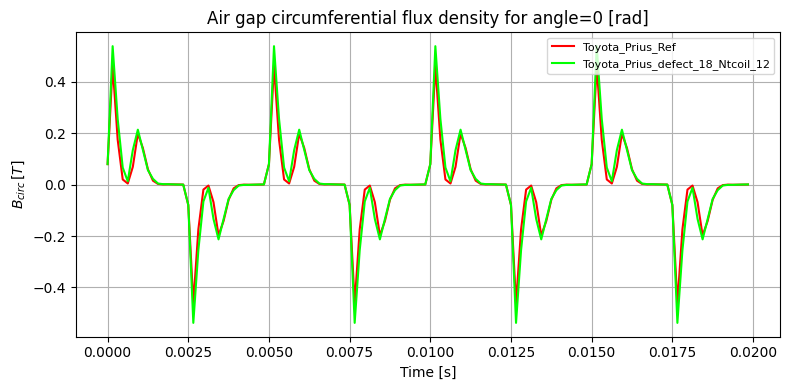

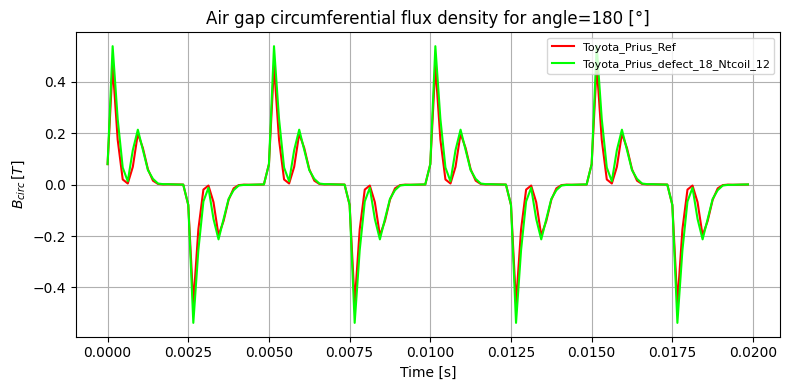

In [78]:
out_ref = simu_ref.run()
# out_defect17 = simu_defect17.run()
out_defect18 = simu_defect18.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect17,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_17_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect18,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_18_Ntcoil_12"]
)

In [79]:
# out_defect17.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_17_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [80]:
out_defect18.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_18_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:23:19] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\Material.json
[14:23:19] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\M400-50A.json
[14:23:19] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\M400-50A_00001.json
[14:23:19] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\Air.json
[14:23:19] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\MagnetPrius.json
[14:23:19] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\MagnetPrius_00001.json
[14:23:19] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_18_ntcoil_12\M400-50A_00002.json
[14:23:19] Saving Copper1 in

In [ ]:
----------------------------------------------------------------------------------------------------------------------------

In [81]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect19 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_19_Ntcoil_12.json")
machine_defect20= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_20_Ntcoil_12.json")

In [83]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect19 = load_simulation(name="defect19", machine=machine_defect19, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect20 = load_simulation(name="defect20", machine=machine_defect20, rotor_speed=3000, stop=1, num_steps=4000)

In [87]:
out_ref = simu_ref.run()
# out_defect19 = simu_defect19.run()
out_defect20 = simu_defect20.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect19,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_19_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect20,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_20_Ntcoil_12"]
)

[14:26:57] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:26:57] Starting Magnetic module
[14:26:59] Computing Airgap Flux in FEMM
[14:27:08] End of simulation FEMM_simulation
[14:27:08] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_20_Ntcoil_12)
[14:27:08] Starting Magnetic module
[14:27:09] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [88]:
# out_defect19.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_19_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [89]:
# out_defect20.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_20_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [90]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect21 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_21_Ntcoil_12.json")
machine_defect22= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_22_Ntcoil_12.json")

In [91]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect21 = load_simulation(name="defect21", machine=machine_defect21, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect22 = load_simulation(name="defect22", machine=machine_defect22, rotor_speed=3000, stop=1, num_steps=4000)

[14:28:38] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:28:38] Starting Magnetic module
[14:28:42] Computing Airgap Flux in FEMM
[14:29:01] End of simulation FEMM_simulation
[14:29:01] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_22_Ntcoil_12)
[14:29:01] Starting Magnetic module
[14:29:03] Computing Airgap Flux in FEMM
[14:29:13] End of simulation FEMM_simulation


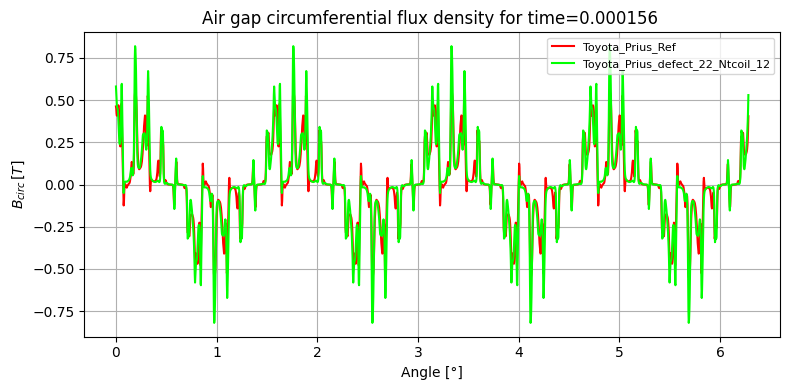

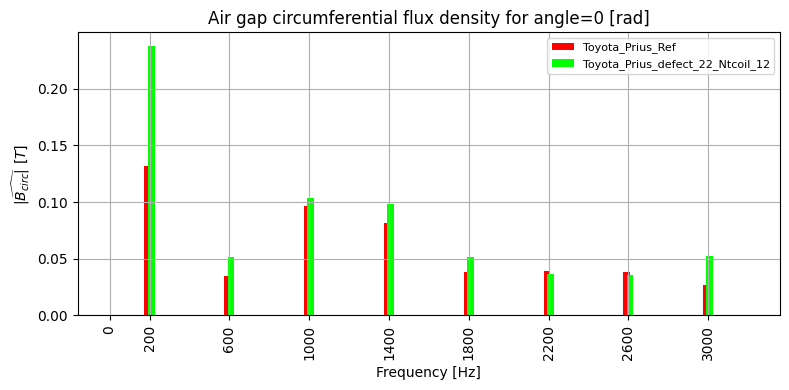

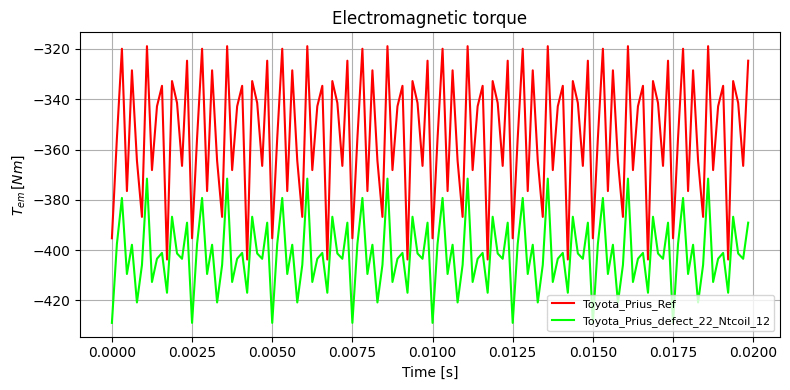

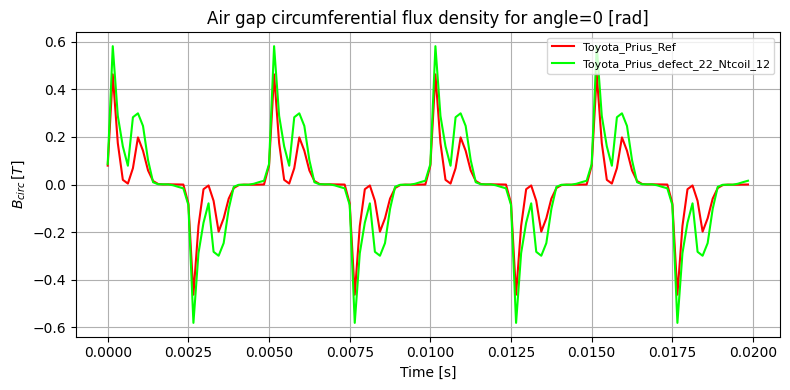

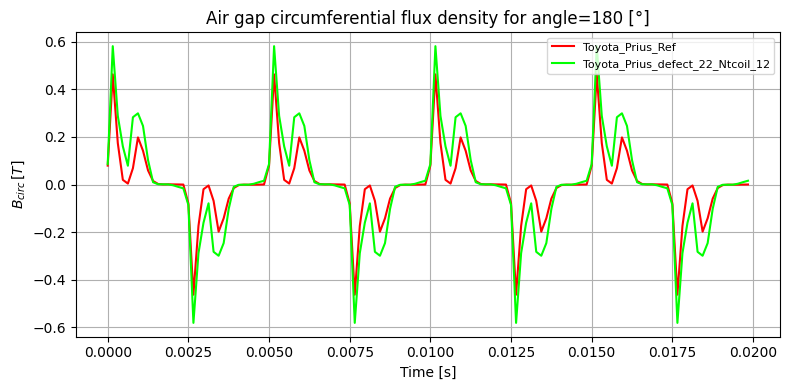

In [93]:
out_ref = simu_ref.run()
# out_defect21 = simu_defect21.run()
out_defect22 = simu_defect22.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect21,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_21_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect22,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_22_Ntcoil_12"]
)

In [94]:
# out_defect21.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_21_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [95]:
out_defect22.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_22_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:31:29] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\Material.json
[14:31:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\M400-50A.json
[14:31:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\M400-50A_00001.json
[14:31:29] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\Air.json
[14:31:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\MagnetPrius.json
[14:31:29] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\MagnetPrius_00001.json
[14:31:29] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_22_ntcoil_12\M400-50A_00002.json
[14:31:29] Saving Copper1 in

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [96]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect23 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_23_Ntcoil_12.json")
machine_defect24= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_24_Ntcoil_12.json")

In [97]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect23 = load_simulation(name="defect23", machine=machine_defect23, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect24 = load_simulation(name="defect24", machine=machine_defect24, rotor_speed=3000, stop=1, num_steps=4000)

[14:33:48] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:33:48] Starting Magnetic module
[14:33:49] Computing Airgap Flux in FEMM
[14:33:59] End of simulation FEMM_simulation
[14:33:59] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_24_Ntcoil_12)
[14:33:59] Starting Magnetic module
[14:34:00] Computing Airgap Flux in FEMM
[14:34:09] End of simulation FEMM_simulation


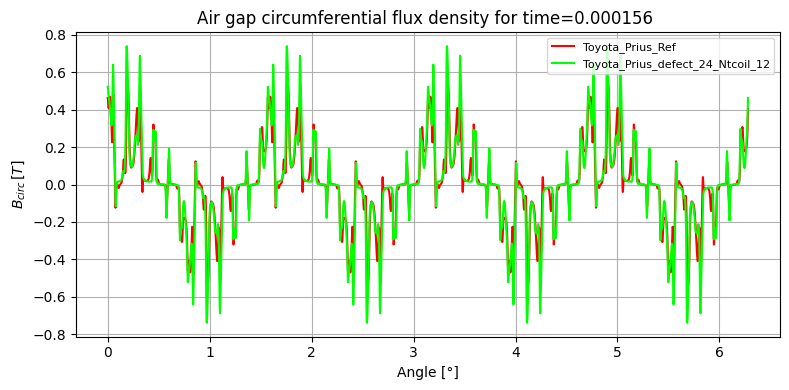

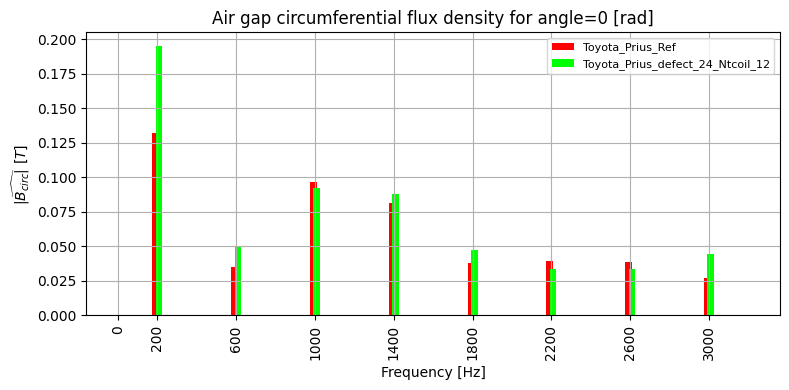

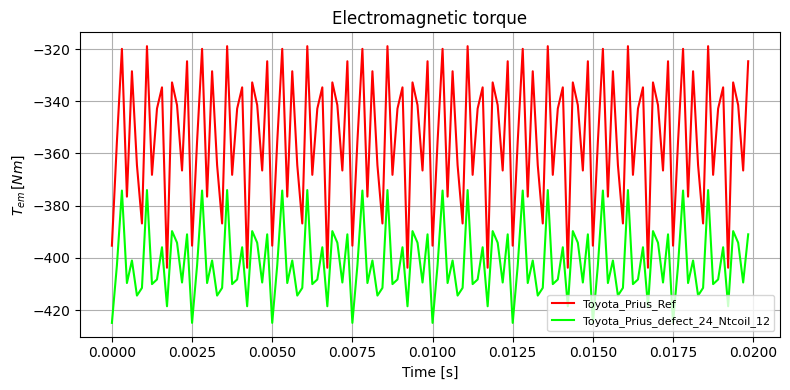

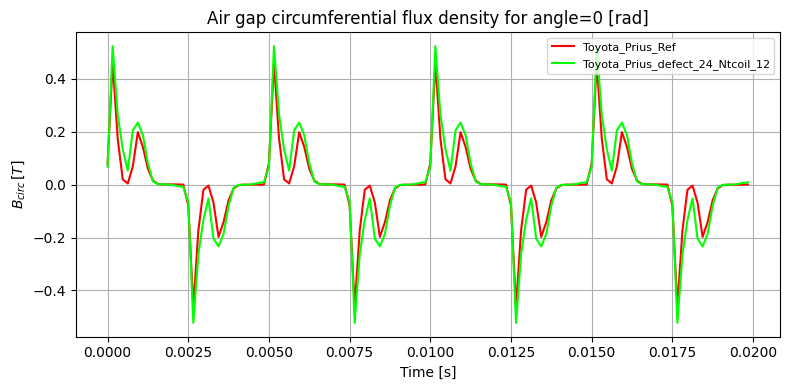

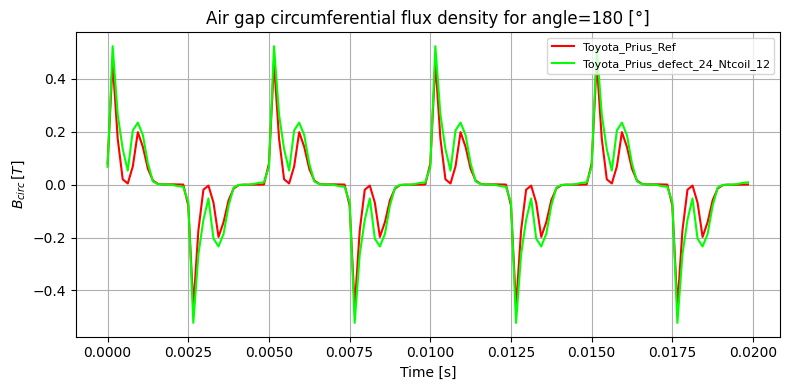

In [100]:
out_ref = simu_ref.run()
# out_defect23 = simu_defect23.run()
out_defect24 = simu_defect24.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect23,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_23_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect24,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_24_Ntcoil_12"]
)

In [101]:
# out_defect23.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_23_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [102]:
out_defect24.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_24_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:34:34] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\Material.json
[14:34:34] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\M400-50A.json
[14:34:34] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\M400-50A_00001.json
[14:34:34] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\Air.json
[14:34:34] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\MagnetPrius.json
[14:34:34] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\MagnetPrius_00001.json
[14:34:34] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_24_ntcoil_12\M400-50A_00002.json
[14:34:34] Saving Copper1 in

In [ ]:
--------------------------------------------------------------------------------------------------------------------------------------

In [103]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect25 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_25_Ntcoil_12.json")
machine_defect26= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_26_Ntcoil_12.json")

In [104]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect25 = load_simulation(name="defect25", machine=machine_defect25, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect26 = load_simulation(name="defect26", machine=machine_defect26, rotor_speed=3000, stop=1, num_steps=4000)

[14:35:30] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:35:31] Starting Magnetic module
[14:35:32] Computing Airgap Flux in FEMM
[14:35:40] End of simulation FEMM_simulation
[14:35:40] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_25_Ntcoil_12)
[14:35:40] Starting Magnetic module
[14:35:42] Computing Airgap Flux in FEMM
[14:35:50] End of simulation FEMM_simulation
[14:35:50] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_26_Ntcoil_12)
[14:35:50] Starting Magnetic module
[14:35:51] Computing Airgap Flux in FEMM
[14:36:00] End of simulation FEMM_simulation


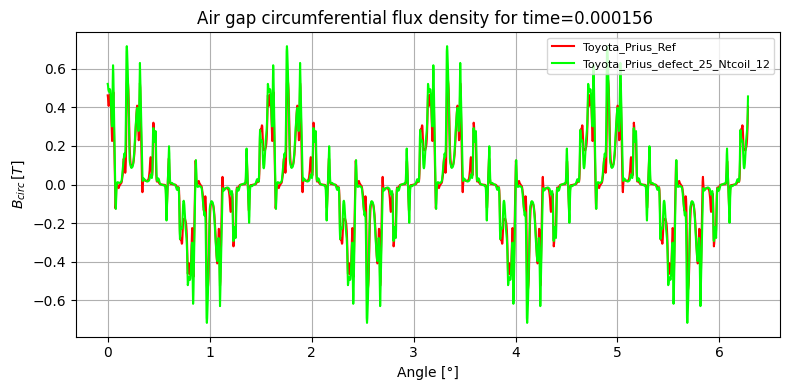

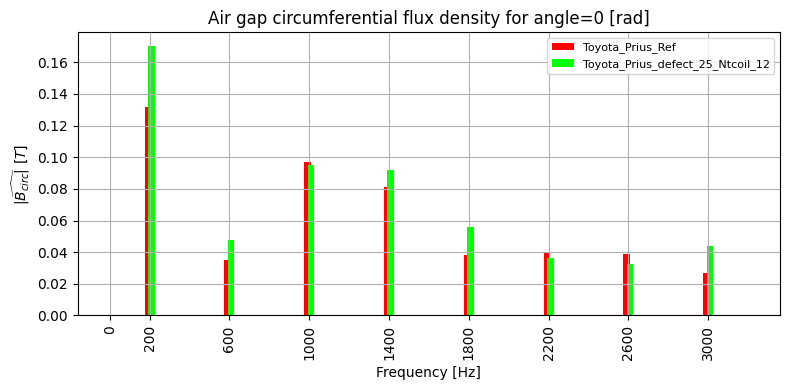

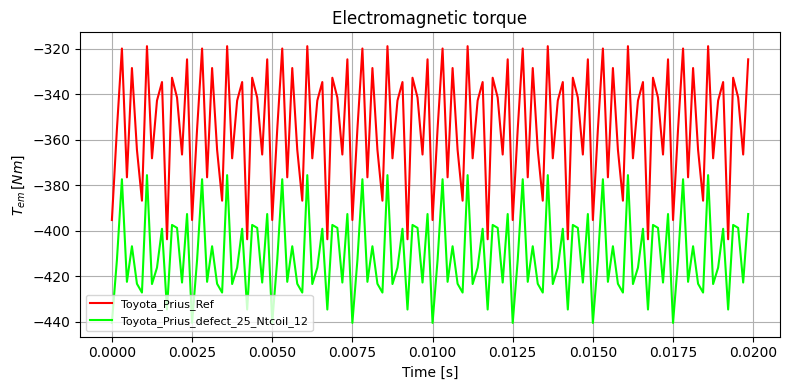

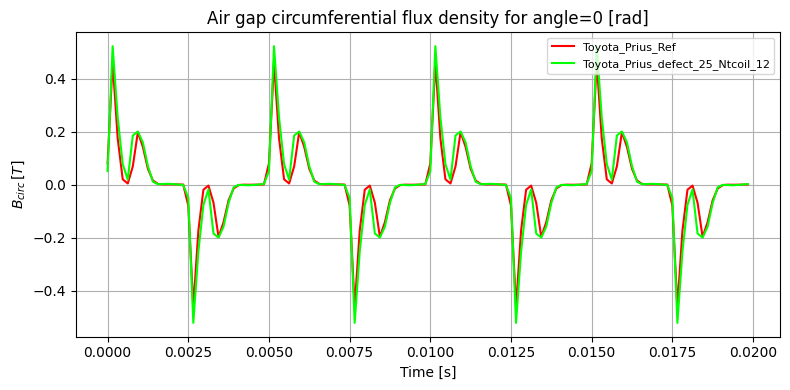

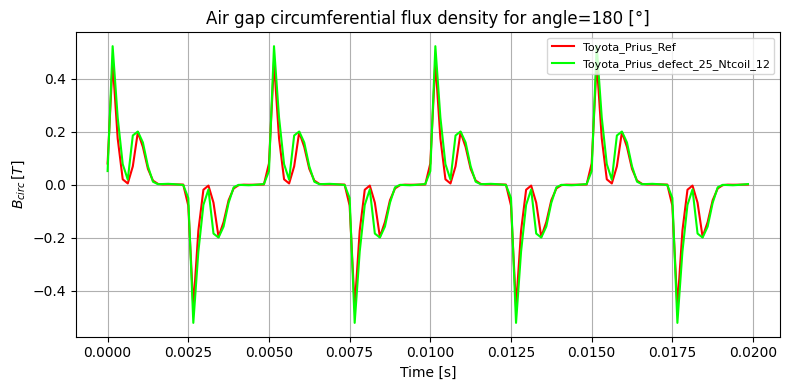

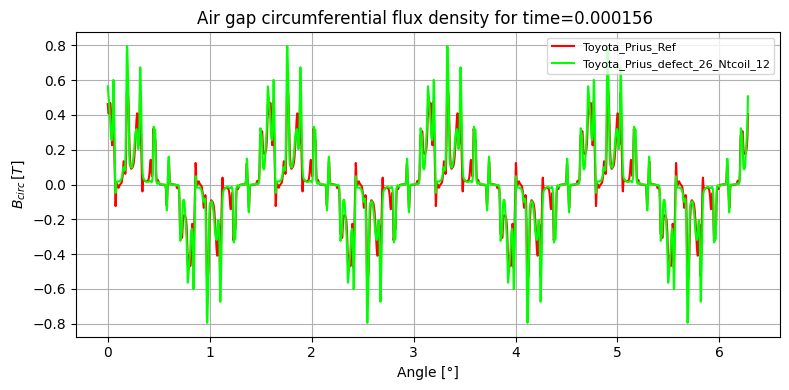

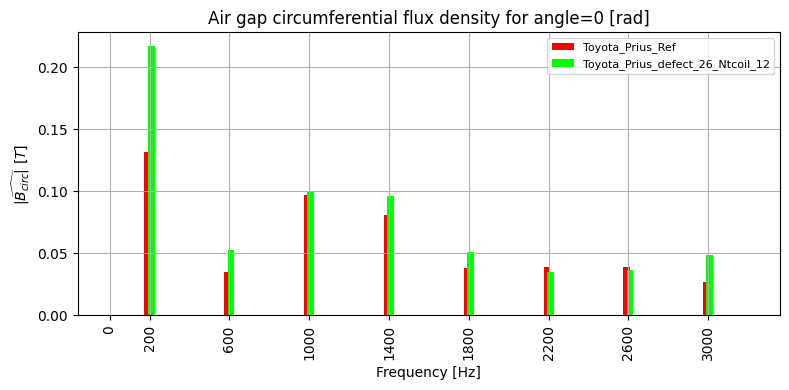

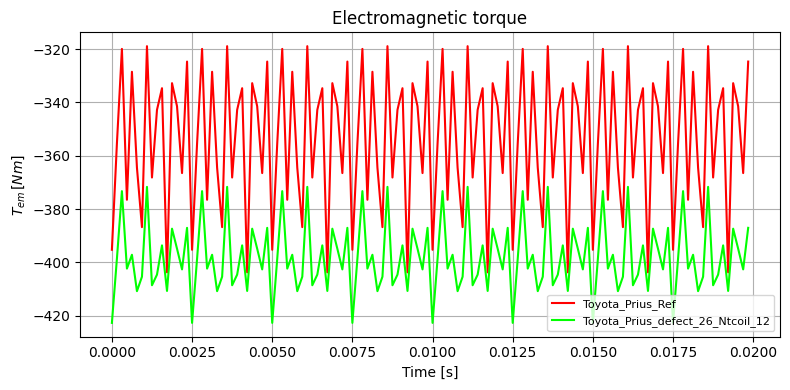

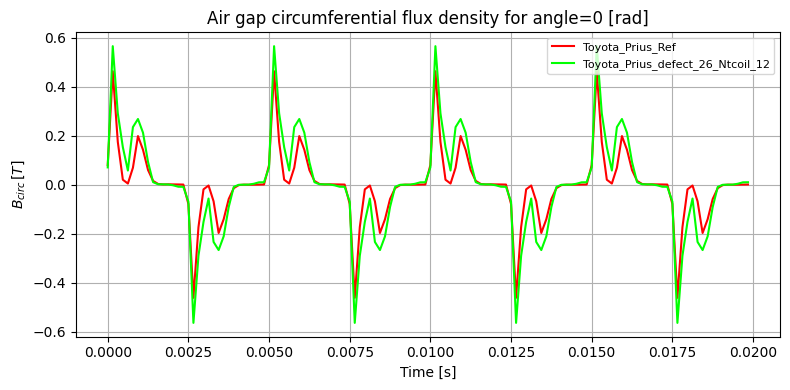

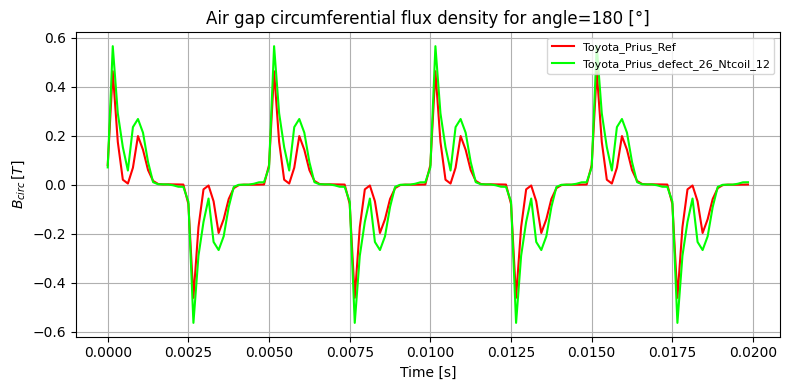

In [105]:
out_ref = simu_ref.run()
out_defect25 = simu_defect25.run()
out_defect26 = simu_defect26.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect25,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_25_Ntcoil_12"]
)
compare_simulation_results(
    out1=out_ref,
    out2=out_defect26,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_26_Ntcoil_12"]
)

In [106]:
out_defect25.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_25_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:36:20] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\Material.json
[14:36:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\M400-50A.json
[14:36:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\M400-50A_00001.json
[14:36:20] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\Air.json
[14:36:20] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\MagnetPrius.json
[14:36:20] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\MagnetPrius_00001.json
[14:36:20] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_25_ntcoil_12\M400-50A_00002.json
[14:36:20] Saving Copper1 in

In [107]:
out_defect26.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_26_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:36:23] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\Material.json
[14:36:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\M400-50A.json
[14:36:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\M400-50A_00001.json
[14:36:23] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\Air.json
[14:36:23] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\MagnetPrius.json
[14:36:23] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\MagnetPrius_00001.json
[14:36:23] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_26_ntcoil_12\M400-50A_00002.json
[14:36:23] Saving Copper1 in

In [ ]:
---------------------------------------------------------------------------------------------------------------------------

In [108]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect27 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_27_Ntcoil_12.json")
machine_defect28= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_28_Ntcoil_12.json")

In [109]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect27 = load_simulation(name="defect27", machine=machine_defect27, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect28 = load_simulation(name="defect28", machine=machine_defect28, rotor_speed=3000, stop=1, num_steps=4000)

[14:37:49] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:37:49] Starting Magnetic module
[14:37:50] Computing Airgap Flux in FEMM
[14:38:00] End of simulation FEMM_simulation
[14:38:00] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_28_Ntcoil_12)
[14:38:00] Starting Magnetic module
[14:38:01] Computing Airgap Flux in FEMM
[14:38:10] End of simulation FEMM_simulation


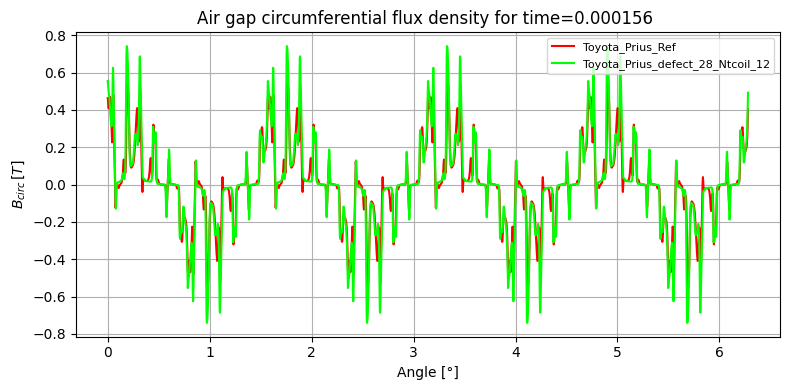

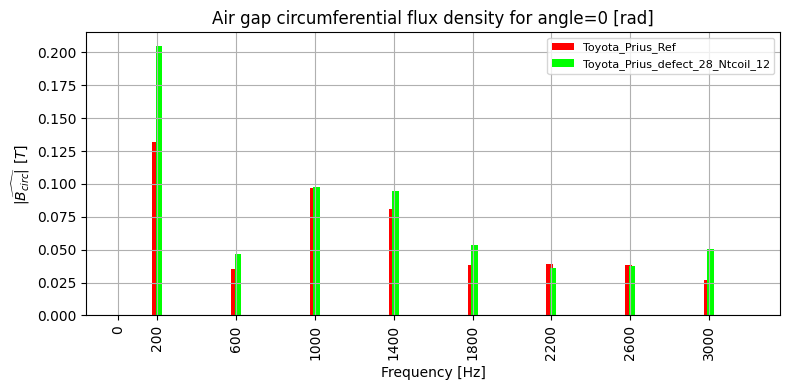

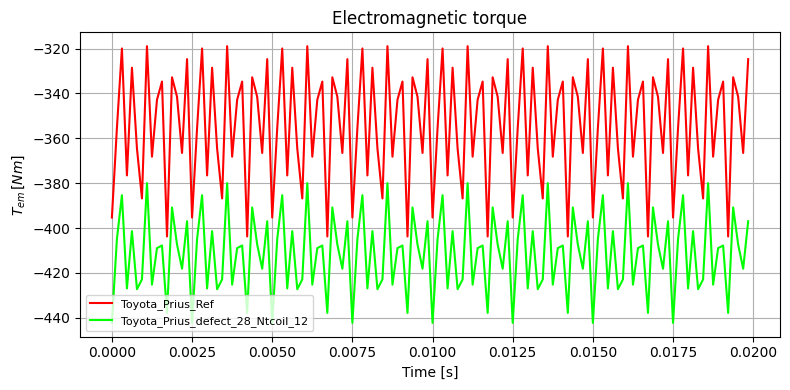

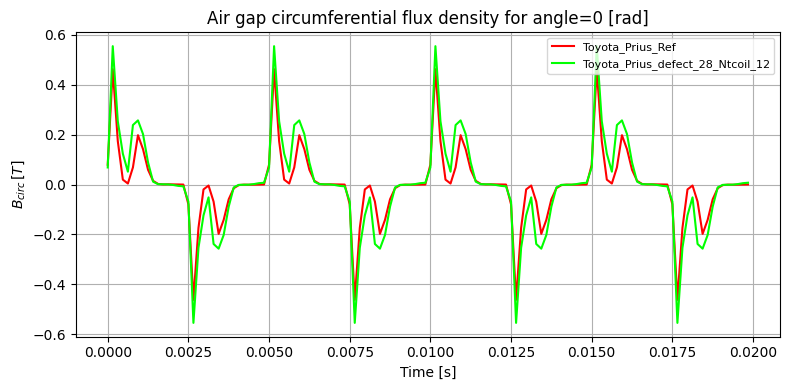

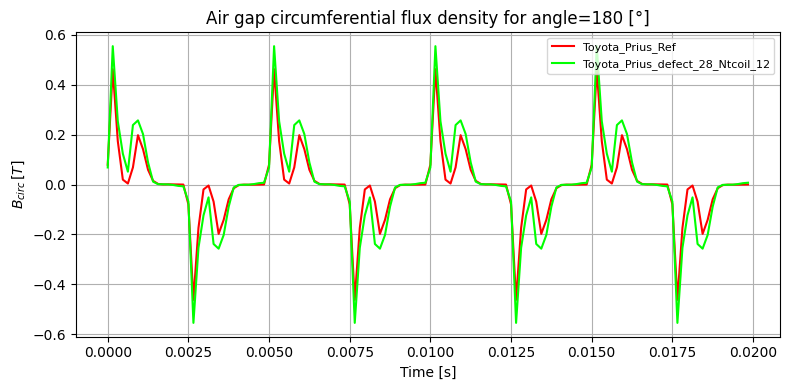

In [112]:
out_ref = simu_ref.run()
# out_defect27 = simu_defect27.run()
out_defect28 = simu_defect28.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect27,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_27_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect28,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_28_Ntcoil_12"]
)

In [113]:
# out_defect27.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_27_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [114]:
out_defect28.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_28_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[14:38:56] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\Material.json
[14:38:56] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\M400-50A.json
[14:38:56] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\M400-50A_00001.json
[14:38:56] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\Air.json
[14:38:56] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\MagnetPrius.json
[14:38:56] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\MagnetPrius_00001.json
[14:38:56] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_28_ntcoil_12\M400-50A_00002.json
[14:38:56] Saving Copper1 in

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [115]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect29 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_29_Ntcoil_12.json")
machine_defect30= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_30_Ntcoil_12.json")

In [116]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect29 = load_simulation(name="defect29", machine=machine_defect29, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect30 = load_simulation(name="defect30", machine=machine_defect30, rotor_speed=3000, stop=1, num_steps=4000)

In [119]:
out_ref = simu_ref.run()
out_defect29 = simu_defect29.run()
out_defect30 = simu_defect30.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect29,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_29_Ntcoil_12"]
)
compare_simulation_results(
    out1=out_ref,
    out2=out_defect20,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_30_Ntcoil_12"]
)

[14:40:18] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[14:40:18] Starting Magnetic module
[14:40:20] Computing Airgap Flux in FEMM
[14:40:29] End of simulation FEMM_simulation
[14:40:29] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_29_Ntcoil_12)
[14:40:29] Starting Magnetic module
[14:40:31] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [120]:
# out_defect29.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_29_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [121]:
# out_defect30.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_30_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [122]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect31 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_31_Ntcoil_12.json")
machine_defect32= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_32_Ntcoil_12.json")

In [123]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect31 = load_simulation(name="defect31", machine=machine_defect31, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect32 = load_simulation(name="defect32", machine=machine_defect32, rotor_speed=3000, stop=1, num_steps=4000)

[15:13:34] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[15:13:34] Starting Magnetic module
[15:13:36] Computing Airgap Flux in FEMM
[15:13:45] End of simulation FEMM_simulation
[15:13:45] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_32_Ntcoil_12)
[15:13:45] Starting Magnetic module
[15:13:46] Computing Airgap Flux in FEMM
[15:13:55] End of simulation FEMM_simulation


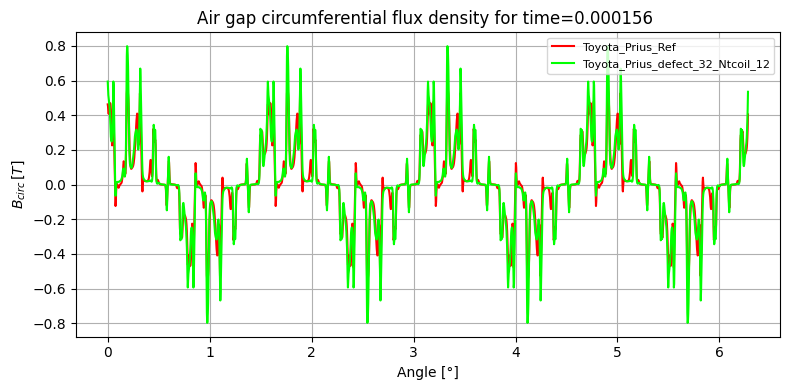

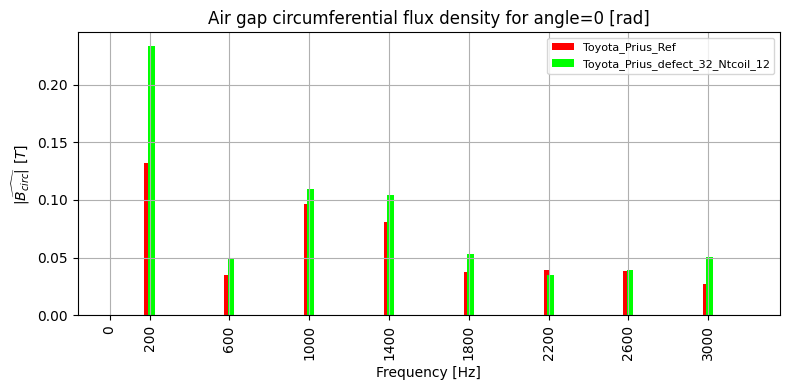

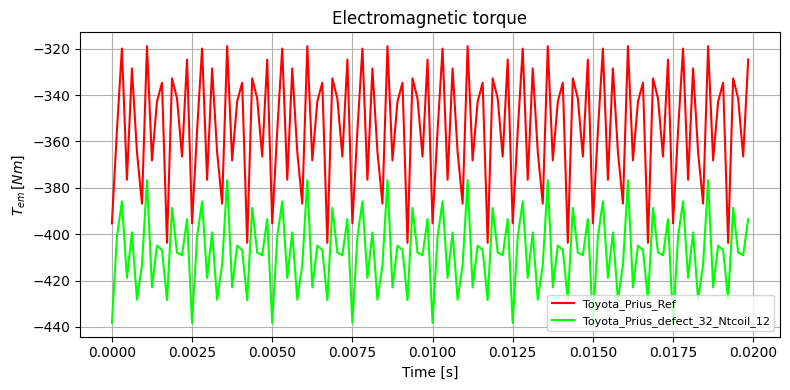

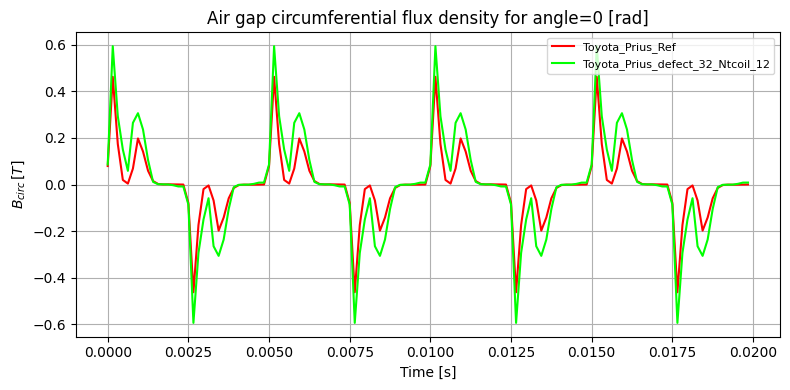

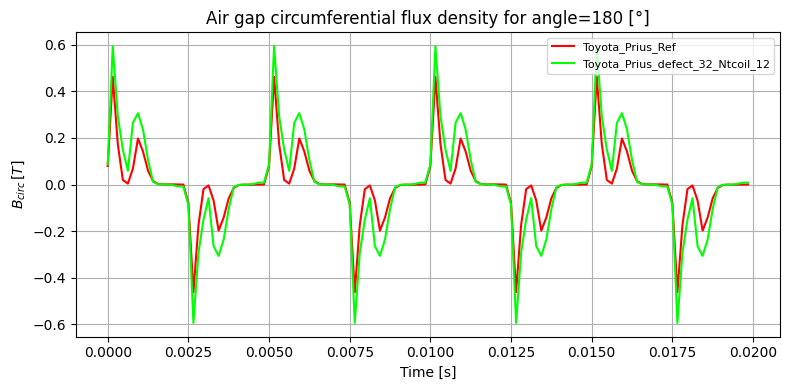

In [125]:
out_ref = simu_ref.run()
# out_defect31 = simu_defect31.run()
out_defect32 = simu_defect32.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect31,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_31_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect32,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_32_Ntcoil_12"]
)

In [126]:
# out_defect31.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_31_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [127]:
out_defect32.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_32_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[15:15:18] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\Material.json
[15:15:18] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\M400-50A.json
[15:15:18] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\M400-50A_00001.json
[15:15:18] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\Air.json
[15:15:18] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\MagnetPrius.json
[15:15:18] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\MagnetPrius_00001.json
[15:15:18] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_32_ntcoil_12\M400-50A_00002.json
[15:15:18] Saving Copper1 in

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [128]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect33 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_33_Ntcoil_12.json")
machine_defect34= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_34_Ntcoil_12.json")

In [129]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect33 = load_simulation(name="defect33", machine=machine_defect33, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect34 = load_simulation(name="defect34", machine=machine_defect34, rotor_speed=3000, stop=1, num_steps=4000)

In [132]:
out_ref = simu_ref.run()
out_defect33 = simu_defect33.run()
# out_defect34 = simu_defect34.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect33,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_33_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect34,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_34_Ntcoil_12"]
# )

[15:16:39] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[15:16:39] Starting Magnetic module
[15:16:40] Computing Airgap Flux in FEMM
[15:16:50] End of simulation FEMM_simulation
[15:16:50] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_33_Ntcoil_12)
[15:16:50] Starting Magnetic module
[15:16:52] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [134]:
# out_defect33.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_33_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [135]:
# out_defect34.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_34_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [136]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect35 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_35_Ntcoil_12.json")
machine_defect36= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_36_Ntcoil_12.json")

In [137]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect35 = load_simulation(name="defect35", machine=machine_defect35, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect36 = load_simulation(name="defect36", machine=machine_defect36, rotor_speed=3000, stop=1, num_steps=4000)

In [140]:
out_ref = simu_ref.run()
out_defect35 = simu_defect35.run()
# out_defect36 = simu_defect36.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect35,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_35_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect36,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_36_Ntcoil_12"]
)

[17:23:17] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:23:17] Starting Magnetic module
[17:23:20] Computing Airgap Flux in FEMM
[17:23:34] End of simulation FEMM_simulation
[17:23:34] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_35_Ntcoil_12)
[17:23:34] Starting Magnetic module
[17:23:35] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [141]:
# out_defect35.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_35_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [142]:
# out_defect36.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_36_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-------------------------------------------------------------------------------------------------------------------------------

In [143]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect37 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_37_Ntcoil_12.json")
machine_defect38= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_38_Ntcoil_12.json")

In [144]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect37 = load_simulation(name="defect37", machine=machine_defect37, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect38 = load_simulation(name="defect38", machine=machine_defect38, rotor_speed=3000, stop=1, num_steps=4000)

[17:26:34] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:26:34] Starting Magnetic module
[17:26:35] Computing Airgap Flux in FEMM
[17:26:44] End of simulation FEMM_simulation
[17:26:44] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_38_Ntcoil_12)
[17:26:44] Starting Magnetic module
[17:26:45] Computing Airgap Flux in FEMM
[17:26:54] End of simulation FEMM_simulation


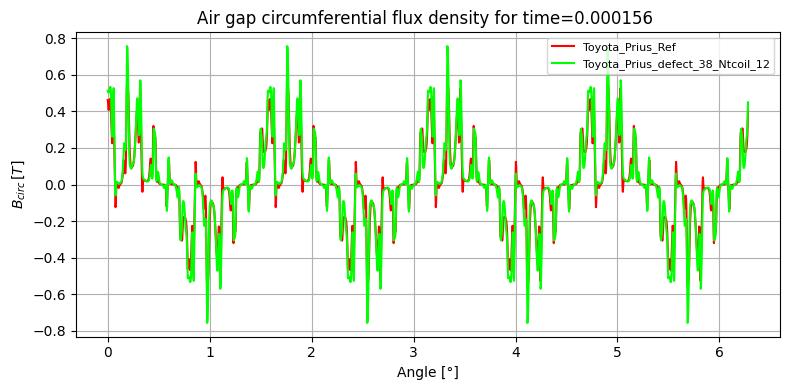

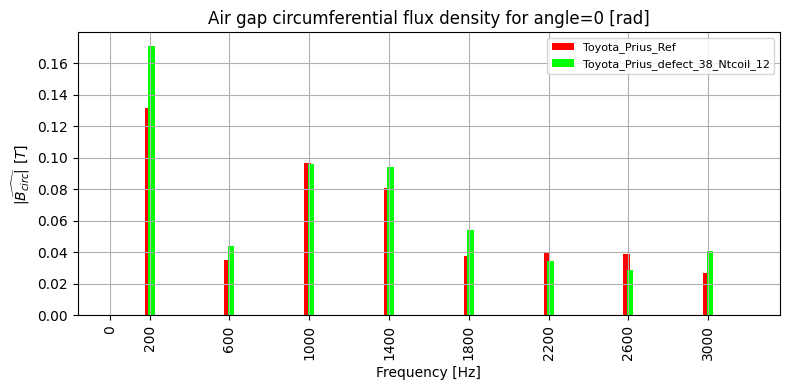

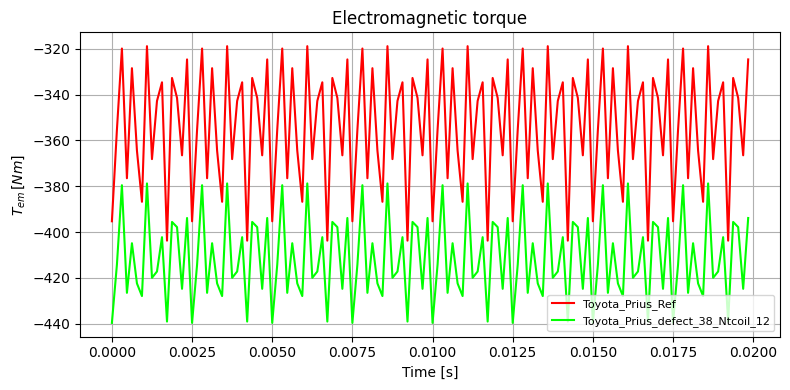

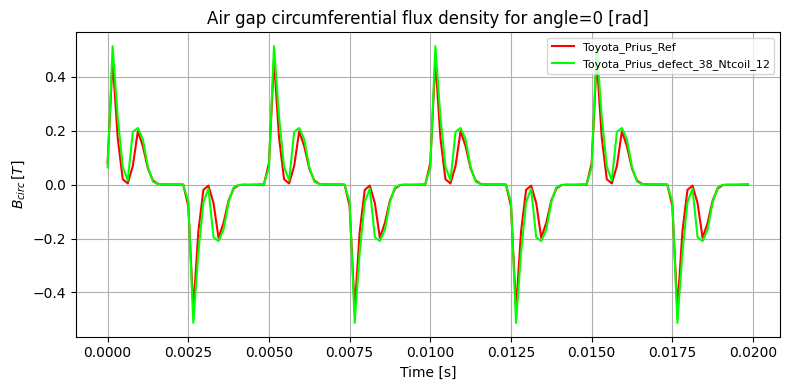

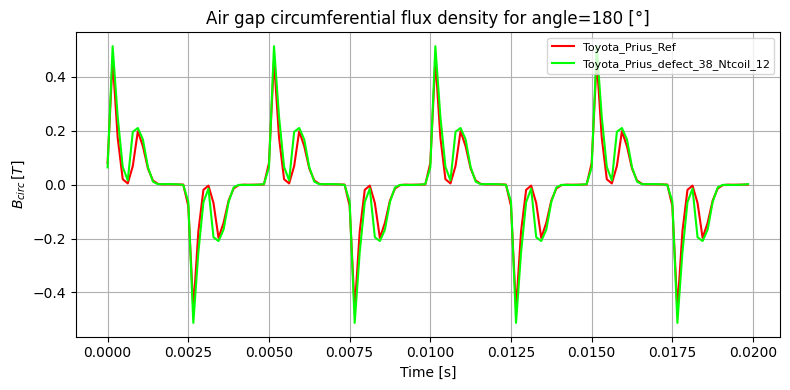

In [147]:
out_ref = simu_ref.run()
# out_defect37 = simu_defect37.run()
out_defect38 = simu_defect38.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect37,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_37_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect38,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_38_Ntcoil_12"]
)

In [148]:
# out_defect37.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_37_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [149]:
out_defect38.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_38_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[17:27:39] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\Material.json
[17:27:39] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\M400-50A.json
[17:27:39] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\M400-50A_00001.json
[17:27:39] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\Air.json
[17:27:39] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\MagnetPrius.json
[17:27:39] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\MagnetPrius_00001.json
[17:27:39] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_38_ntcoil_12\M400-50A_00002.json
[17:27:39] Saving Copper1 in

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [150]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect39 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_39_Ntcoil_12.json")
machine_defect40= load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_40_Ntcoil_12.json")

In [151]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect39 = load_simulation(name="defect39", machine=machine_defect39, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect40 = load_simulation(name="defect40", machine=machine_defect40, rotor_speed=3000, stop=1, num_steps=4000)

In [155]:
out_ref = simu_ref.run()
out_defect39 = simu_defect39.run()
# out_defect40 = simu_defect40.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect39,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_39_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect40,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_40_Ntcoil_12"]
# )

[17:29:47] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:29:47] Starting Magnetic module
[17:29:49] Computing Airgap Flux in FEMM
[17:29:57] End of simulation FEMM_simulation
[17:29:57] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_39_Ntcoil_12)
[17:29:57] Starting Magnetic module
[17:29:58] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [156]:
# out_defect39.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_39_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [157]:
# out_defect40.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_40_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-------------------------------------------------------------------------------------------------------------------------------

In [158]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect41 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_41_Ntcoil_12.json")
machine_defect42 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_42_Ntcoil_12.json")

In [159]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect41 = load_simulation(name="defect41", machine=machine_defect41, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect42 = load_simulation(name="defect42", machine=machine_defect42, rotor_speed=3000, stop=1, num_steps=4000)

In [162]:
out_ref = simu_ref.run()
out_defect41 = simu_defect41.run()
# out_defect42 = simu_defect42.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect41,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_41_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect42,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_42_Ntcoil_12"]
# )

[17:31:44] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:31:44] Starting Magnetic module
[17:31:45] Computing Airgap Flux in FEMM
[17:31:55] End of simulation FEMM_simulation
[17:31:55] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_41_Ntcoil_12)
[17:31:55] Starting Magnetic module
[17:31:55] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [163]:
# out_defect41.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_41_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [164]:
# out_defect42.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_42_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-------------------------------------------------------------------------------------------------------------------------------

In [165]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect43 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_43_Ntcoil_12.json")
machine_defect44 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_44_Ntcoil_12.json")

In [166]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect43 = load_simulation(name="defect43", machine=machine_defect43, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect44 = load_simulation(name="defect44", machine=machine_defect44, rotor_speed=3000, stop=1, num_steps=4000)

[17:35:00] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:35:00] Starting Magnetic module
[17:35:02] Computing Airgap Flux in FEMM
[17:35:10] End of simulation FEMM_simulation
[17:35:10] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_43_Ntcoil_12)
[17:35:10] Starting Magnetic module
[17:35:13] Computing Airgap Flux in FEMM
[17:35:22] End of simulation FEMM_simulation


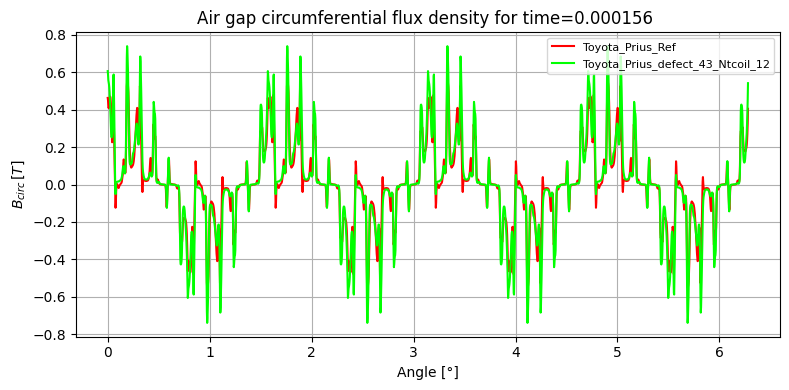

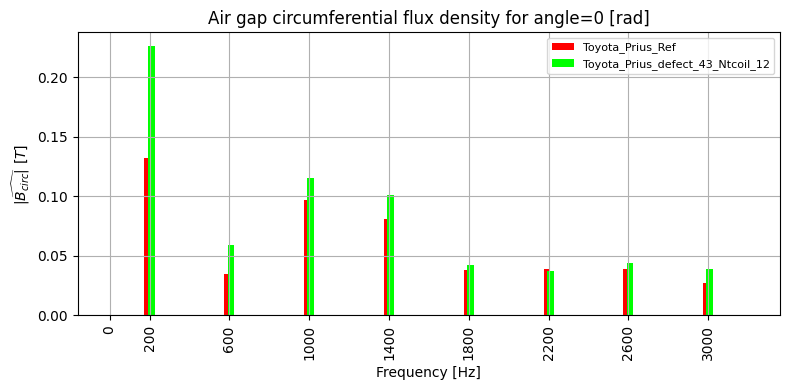

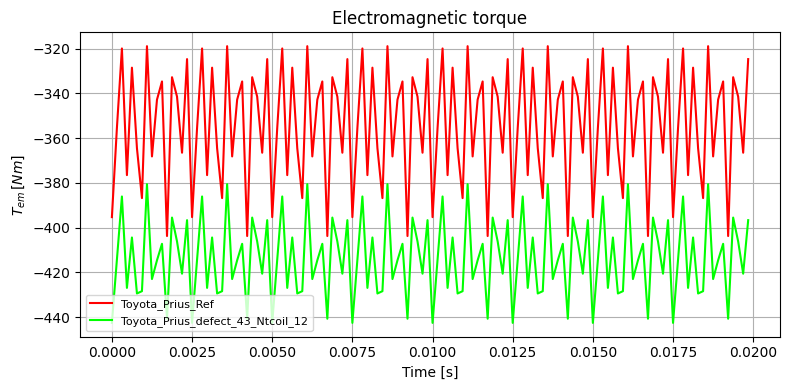

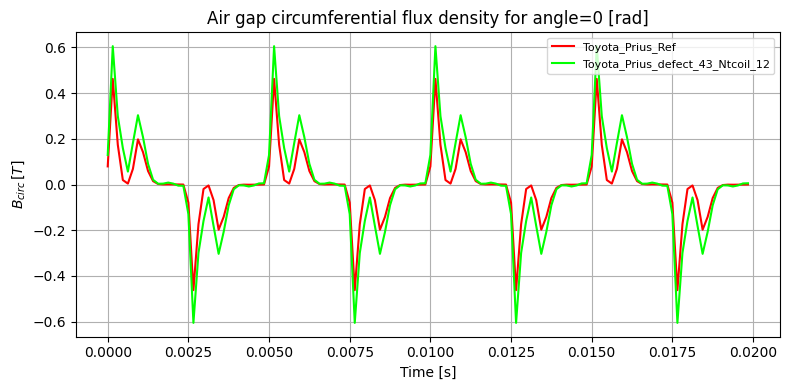

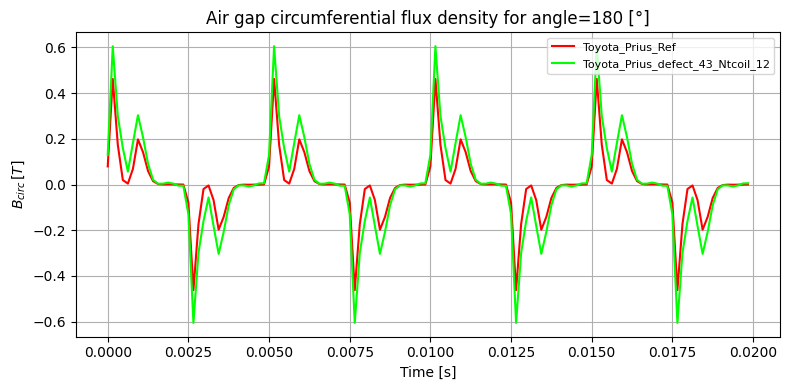

In [169]:
out_ref = simu_ref.run()
out_defect43 = simu_defect43.run()
# out_defect44 = simu_defect44.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect43,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_43_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect44,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_44_Ntcoil_12"]
# )

In [170]:
out_defect43.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_43_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[17:35:45] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\Material.json
[17:35:45] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\M400-50A.json
[17:35:45] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\M400-50A_00001.json
[17:35:45] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\Air.json
[17:35:45] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\MagnetPrius.json
[17:35:45] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\MagnetPrius_00001.json
[17:35:45] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_43_ntcoil_12\M400-50A_00002.json
[17:35:45] Saving Copper1 in

In [171]:
# out_defect44.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_44_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [172]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect45 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_45_Ntcoil_12.json")
machine_defect46 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_46_Ntcoil_12.json")

In [173]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect45 = load_simulation(name="defect45", machine=machine_defect45, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect46 = load_simulation(name="defect46", machine=machine_defect46, rotor_speed=3000, stop=1, num_steps=4000)

In [177]:
out_ref = simu_ref.run()
out_defect45 = simu_defect45.run()
# out_defect46 = simu_defect46.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect45,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_45_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect46,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_46_Ntcoil_12"]
)

[17:38:34] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:38:34] Starting Magnetic module
[17:38:35] Computing Airgap Flux in FEMM
[17:38:44] End of simulation FEMM_simulation
[17:38:44] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_45_Ntcoil_12)
[17:38:44] Starting Magnetic module
[17:38:46] Computing Airgap Flux in FEMM


Exception: error: Material properties have not been defined for all regions

In [178]:
# out_defect45.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_45_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [179]:
# out_defect46.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_46_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [180]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect47 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_47_Ntcoil_12.json")
machine_defect48 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_48_Ntcoil_12.json")

In [181]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect47 = load_simulation(name="defect47", machine=machine_defect47, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect48 = load_simulation(name="defect48", machine=machine_defect48, rotor_speed=3000, stop=1, num_steps=4000)

[17:40:02] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:40:02] Starting Magnetic module
[17:40:03] Computing Airgap Flux in FEMM
[17:40:12] End of simulation FEMM_simulation
[17:40:12] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_48_Ntcoil_12)
[17:40:12] Starting Magnetic module
[17:40:14] Computing Airgap Flux in FEMM
[17:40:22] End of simulation FEMM_simulation


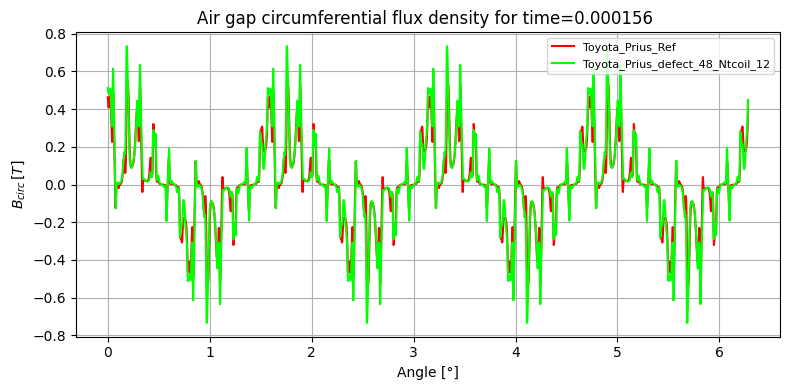

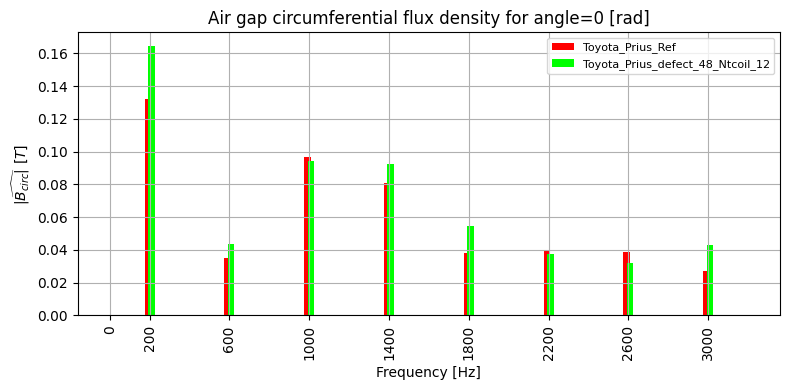

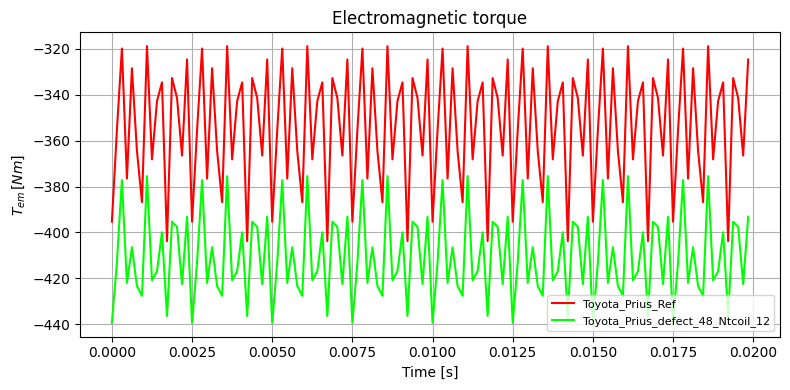

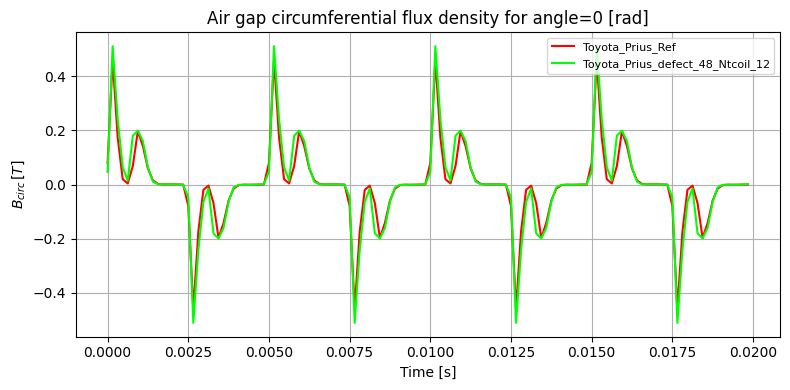

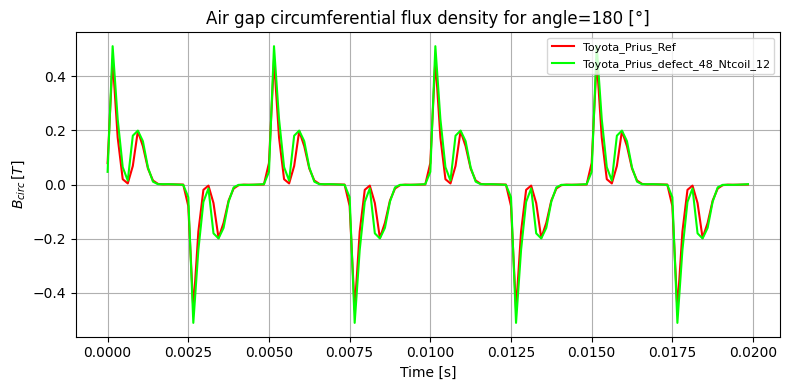

In [183]:
out_ref = simu_ref.run()
# out_defect47 = simu_defect47.run()
out_defect48 = simu_defect48.run()

# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect47,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_47_Ntcoil_12"]
# )
compare_simulation_results(
    out1=out_ref,
    out2=out_defect48,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_48_Ntcoil_12"]
)

In [184]:
# out_defect47.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_47_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [185]:
out_defect48.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_48_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[17:40:50] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\Material.json
[17:40:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\M400-50A.json
[17:40:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\M400-50A_00001.json
[17:40:50] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\Air.json
[17:40:50] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\MagnetPrius.json
[17:40:50] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\MagnetPrius_00001.json
[17:40:50] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_48_ntcoil_12\M400-50A_00002.json
[17:40:50] Saving Copper1 in

In [ ]:
-----------------------------------------------------------------------------------------------------------------------------

In [186]:
# Chargement des machines
machine_ref = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
machine_defect49 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_49_Ntcoil_12.json")
machine_defect50 = load("machines_custom_batch_100_ntcoil/Toyota_Prius_defect_50_Ntcoil_12.json")

In [187]:
simu_ref = load_simulation(name="ref", machine=machine_ref, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect49 = load_simulation(name="defect49", machine=machine_defect49, rotor_speed=3000, stop=1, num_steps=4000)
simu_defect50 = load_simulation(name="defect50", machine=machine_defect50, rotor_speed=3000, stop=1, num_steps=4000)

[17:43:50] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[17:43:50] Starting Magnetic module
[17:43:51] Computing Airgap Flux in FEMM
[17:44:01] End of simulation FEMM_simulation
[17:44:01] Starting running simulation FEMM_simulation (machine=Toyota_Prius_defect_49_Ntcoil_12)
[17:44:01] Starting Magnetic module
[17:44:02] Computing Airgap Flux in FEMM
[17:44:11] End of simulation FEMM_simulation


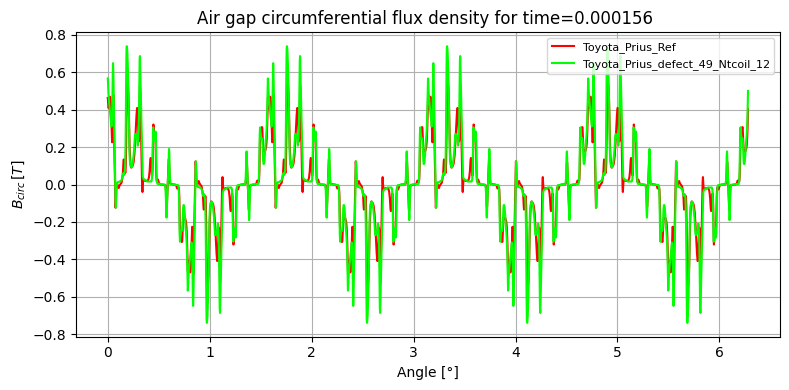

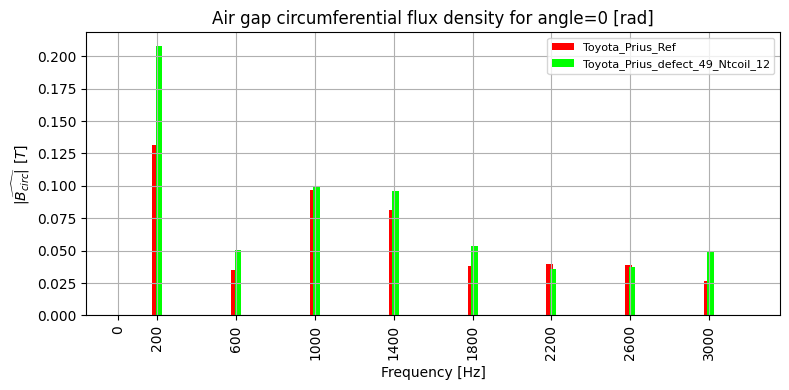

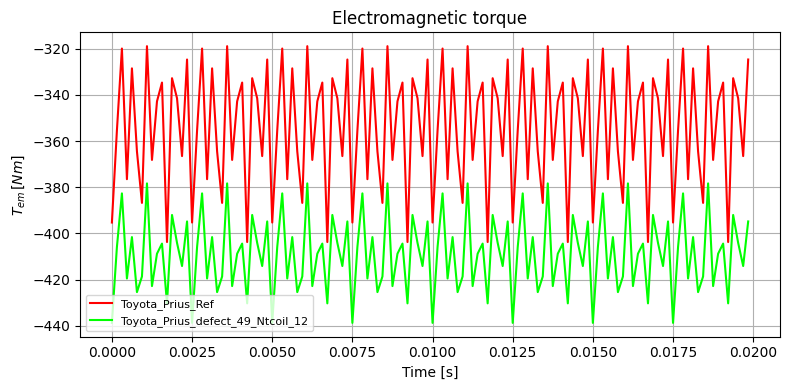

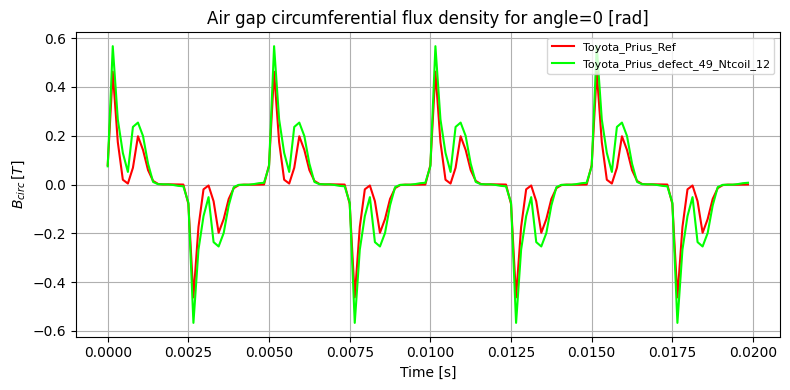

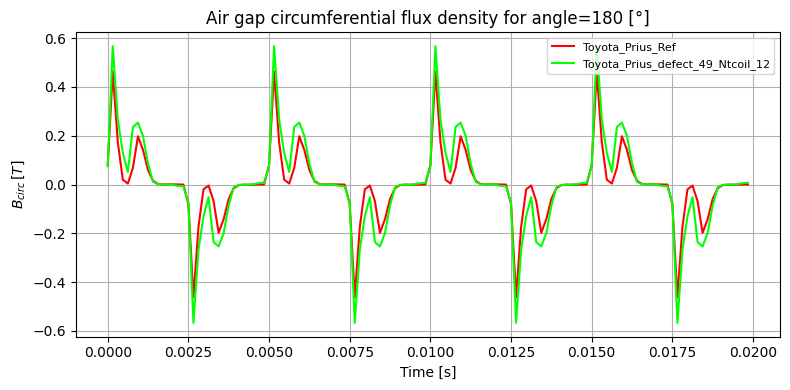

In [190]:
out_ref = simu_ref.run()
out_defect49 = simu_defect49.run()
# out_defect50 = simu_defect50.run()

compare_simulation_results(
    out1=out_ref,
    out2=out_defect49,
    legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_49_Ntcoil_12"]
)
# compare_simulation_results(
#     out1=out_ref,
#     out2=out_defect50,
#     legend_list=["Toyota_Prius_Ref", "Toyota_Prius_defect_50_Ntcoil_12"]
# )

In [191]:
out_defect49.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_49_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

[17:45:05] Saving Material in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\Material.json
[17:45:05] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\M400-50A.json
[17:45:05] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\M400-50A_00001.json
[17:45:05] Saving Air in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\Air.json
[17:45:05] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\MagnetPrius.json
[17:45:05] Saving MagnetPrius in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\MagnetPrius_00001.json
[17:45:05] Saving M400-50A in machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12\compar_simule_defect_49_ntcoil_12\M400-50A_00002.json
[17:45:05] Saving Copper1 in

In [192]:
# out_defect50.save(save_path='machines_custom_batch_100_ntcoil/Machine_defect/Ntcoil_12/compar_simule_defect_50_ntcoil_12', is_folder=True, type_handle_old=2, type_compression=0)

In [ ]:
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------